# Introduction

Penguins are the seabirds. They use their wings to swim underwater, but they cannot fly in the air. In this notebook we examine penguins by their few pieces property. Please send me your feedbacks.

<font color = "green">
Content:
    
1. [Load Data](#1)  
2. [Check Data](#2)      
3. [Variable Descriptions](#3)
     * [Variable Analysis](#4)
        * [Categorical Variable](#5)      
        * [Numerical Variable](#6)
4. [Basic Data Analysis](#7)
5. [Outlier Detection](#8)
6. [Missing Values](#9)
   * [Find Missing Values](#10)
   * [Fill Missing Values](#11)
7. [Visualization](#12)
    * [Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g](#13)
    * [species--culmen_length_mm/culmen_depth_mm](#14)
    * [island--culmen_length_mm/culmen_depth_mm](#15)
    * [species--flipper_length_mm](#16)
    * [island--sex--flipper_length_mm](#17)
    * [species--body_mass_g](#18)
    * [island--body_mass_g](#19)
    * [island-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g](#20)
    * [species-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g](#21)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


<a id = "1" ></a><br>
# Load Data

In [ ]:
df= pd.read_csv("/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv")

<a id = "2" ></a><br>
# Check Data

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

In [ ]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<a id = "3" ></a><br>
# Variable Descriptions
* species = Penguin species (Chinstrap, Adélie, or Gentoo)
* island = Island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* culmen_length_mm = Culmen length of penguin (mm)
* culmen_depth_mm = Culmen depth of penguin (mm)
* flipper_length_mm = flipper length of penguin (mm)
* body_mass_g = Body mass of penguin (g)
* sex = Penguin sex


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* float64(4) =  culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g   
* object(3) = species, island, sex

<a id = "4" ></a><br>
# Variable Analysis
* Categorical Variables(species, island, sex)
* Numerical Variables(culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g)

<a id = "5" ></a><br>
## Categorical Variables


### Species

In [ ]:
df.species.describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

In [ ]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

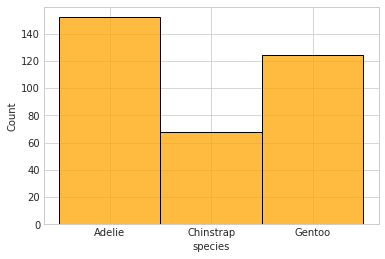

In [ ]:
sns.histplot(x = "species", data = df, color="orange")
plt.show()

* We have 3 unique species values.(Adelie, Chinstrap, Gentoo)
* The most common type is Adelie.(152 times)
* The least common type is Chinstrap.(68 times)


### Island

In [ ]:
df.island.describe()

count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object

In [ ]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

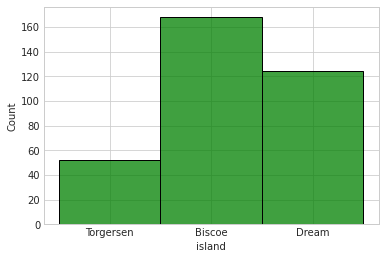

In [ ]:
sns.histplot(x = "island", data = df, color = "green")
plt.show()

* We have 3 unique island values in this dataset.(Biscoe, Dream, Torgersen)
* Biscoe Island is the place where penguins live most.(168)
* Torgersen Island is the place where penguins live least.(52)

### Sex

In [ ]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

* There is '.' value in sex column, lets find this value.

In [ ]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


* Let's assign a value to row ID 336 let's say, Female.

In [ ]:
df.at[336,'sex'] = 'FEMALE'

In [ ]:
df["sex"].isnull().sum()

10

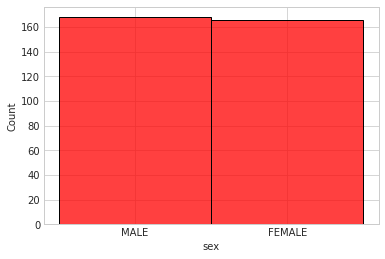

In [ ]:
sns.histplot(x = "sex", data= df, color="red")
plt.show()


* The number of male penguins and female penguins are close to each other, male penguins numbers is 3 more higher then female penguins.
* Also we have 10 missing values about sex.

<a id = "6" ></a><br>
## Numerical Variables

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequancy")
    plt.title("{} distrbution with hist".format(variable))
    plt.show()


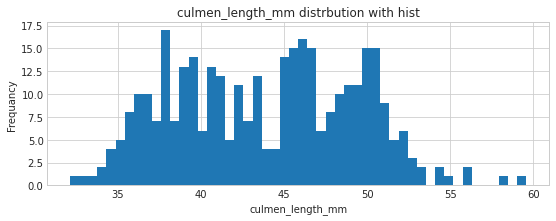

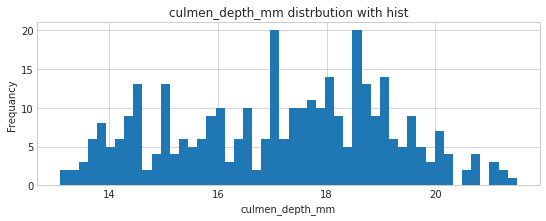

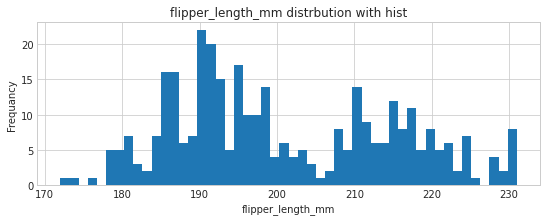

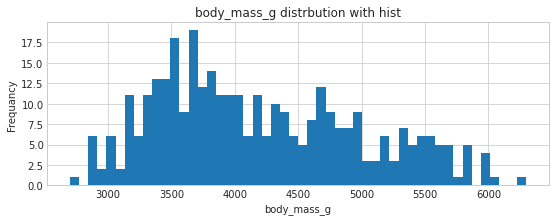

In [ ]:
numeric_variables = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for c in numeric_variables:
    plot_hist(c)

<a id = "7" ></a><br>
## Basic Data Analysis

* species -- culmen_length_mm
* species -- culmen_depth_mm
* species -- flipper_length_mm
* species -- body_mass_g
* island -- culmen_length_mm
* island -- culmen_depth_mm
* island -- flipper_length_mm
* island -- body_mass_g

In [ ]:
#species -- culmen_length_mm
df[["species","culmen_length_mm"]].groupby(["species"],as_index = False).mean().sort_values(by ="culmen_length_mm", ascending = False)

,species,culmen_length_mm
1,Chinstrap,48.833824
2,Gentoo,47.504878
0,Adelie,38.791391


In [ ]:
#species -- culmen_depth_mm
df[["species","culmen_depth_mm"]].groupby(["species"],as_index = False).mean().sort_values(by ="culmen_depth_mm", ascending = False)

,species,culmen_depth_mm
1,Chinstrap,18.420588
0,Adelie,18.346358
2,Gentoo,14.982114


* Chinstraps culmen lenghts and culmen depths averages is higher than others.

In [ ]:
#species -- flipper_length_mm
df[["species","flipper_length_mm"]].groupby(["species"],as_index = False).mean().sort_values(by ="flipper_length_mm", ascending = False)

,species,flipper_length_mm
2,Gentoo,217.186992
1,Chinstrap,195.823529
0,Adelie,189.953642


In [ ]:
#species -- body_mass_g
df[["species","body_mass_g"]].groupby(["species"],as_index = False).mean().sort_values(by ="body_mass_g", ascending = False)

,species,body_mass_g
2,Gentoo,5076.016260
1,Chinstrap,3733.088235
0,Adelie,3700.662252


* Gentoo has the highest body mass and flipper lenght rank, Adelie has the opposite.

In [ ]:
#island -- culmen_length_mm
df[["island","culmen_length_mm"]].groupby(["island"],as_index = False).mean().sort_values(by ="culmen_length_mm", ascending = False)

,island,culmen_length_mm
0,Biscoe,45.257485
1,Dream,44.167742
2,Torgersen,38.950980


In [ ]:
#island -- culmen_depth_mm
df[["island","culmen_depth_mm"]].groupby(["island"],as_index = False).mean().sort_values(by ="culmen_depth_mm", ascending = False)

,island,culmen_depth_mm
2,Torgersen,18.429412
1,Dream,18.344355
0,Biscoe,15.874850


In [ ]:
#island -- flipper_length_mm
df[["island","flipper_length_mm"]].groupby(["island"],as_index = False).mean().sort_values(by ="flipper_length_mm", ascending = False)

,island,flipper_length_mm
0,Biscoe,209.706587
1,Dream,193.072581
2,Torgersen,191.196078


In [ ]:
#island -- body_mass_g
df[["island","body_mass_g"]].groupby(["island"],as_index = False).mean().sort_values(by ="body_mass_g", ascending = False)

,island,body_mass_g
0,Biscoe,4716.017964
1,Dream,3712.903226
2,Torgersen,3706.372549


* Penguins who live in the Biscoe island have highest culmen lenght, flipper lenght and body mass.

<a id = "8" ></a><br>
# Outlier Detection

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
df.loc[detect_outliers(df,["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


* There is no outlier values in this dataset.

<a id = "9" ></a><br>
# Missing Values

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<a id = "10" ></a><br>
## Find Missing Values

In [ ]:
df.columns[df.isnull().any()]

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

* There is 2 missing values in culmen_length_mm column, 2 missing values culmen_depth_mm column, 2 missing values in flipper_length_mm column, 2 missing values in body_mass_g column and 10 missing values in sex column.

<a id = "11" ></a><br>
## Fill Missing Values

In [ ]:
df[df["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


* All these columns except 'sex' (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g) missing values coming from the same datas.
* '3.' and '339.' indexes has no values of any columns.
* Lets handle this missing datas.

In [ ]:
# Handling missing values
from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
df.iloc[:,:] = imputer.fit_transform(df)

In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<a id = "12" ></a><br>
# Visualization
* Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g
* species--culmen_length_mm/culmen_depth_mm
* island--culmen_length_mm/culmen_depth_mm
* species--flipper_length_mm
* island--sex--flipper_length_mm
* species--body_mass_g
* island--body_mass_g
* island-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

<a id = "13" ></a><br>
## Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g

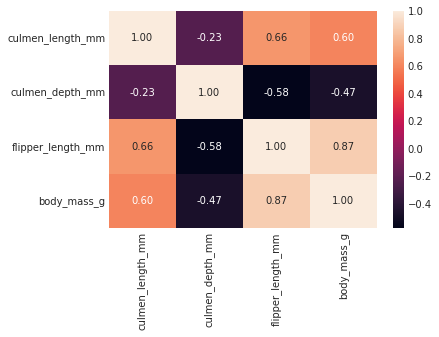

In [ ]:
list1 = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.heatmap(df[list1].corr(),annot = True, fmt = ".2f")
plt.show()

* There is a big positive corelation between flipper_length_mm and body_mass_g.
* Others got moderate correlation between them.

In [ ]:
sns.set_theme()
sns.set(rc = {"figure.dpi" : 300})
sns.set(rc = {"figure.figsize": (6,3)})

* We write these codes for more quality in the graphs

<a id = "14" ></a><br>
## species--culmen_length_mm/culmen_depth_mm


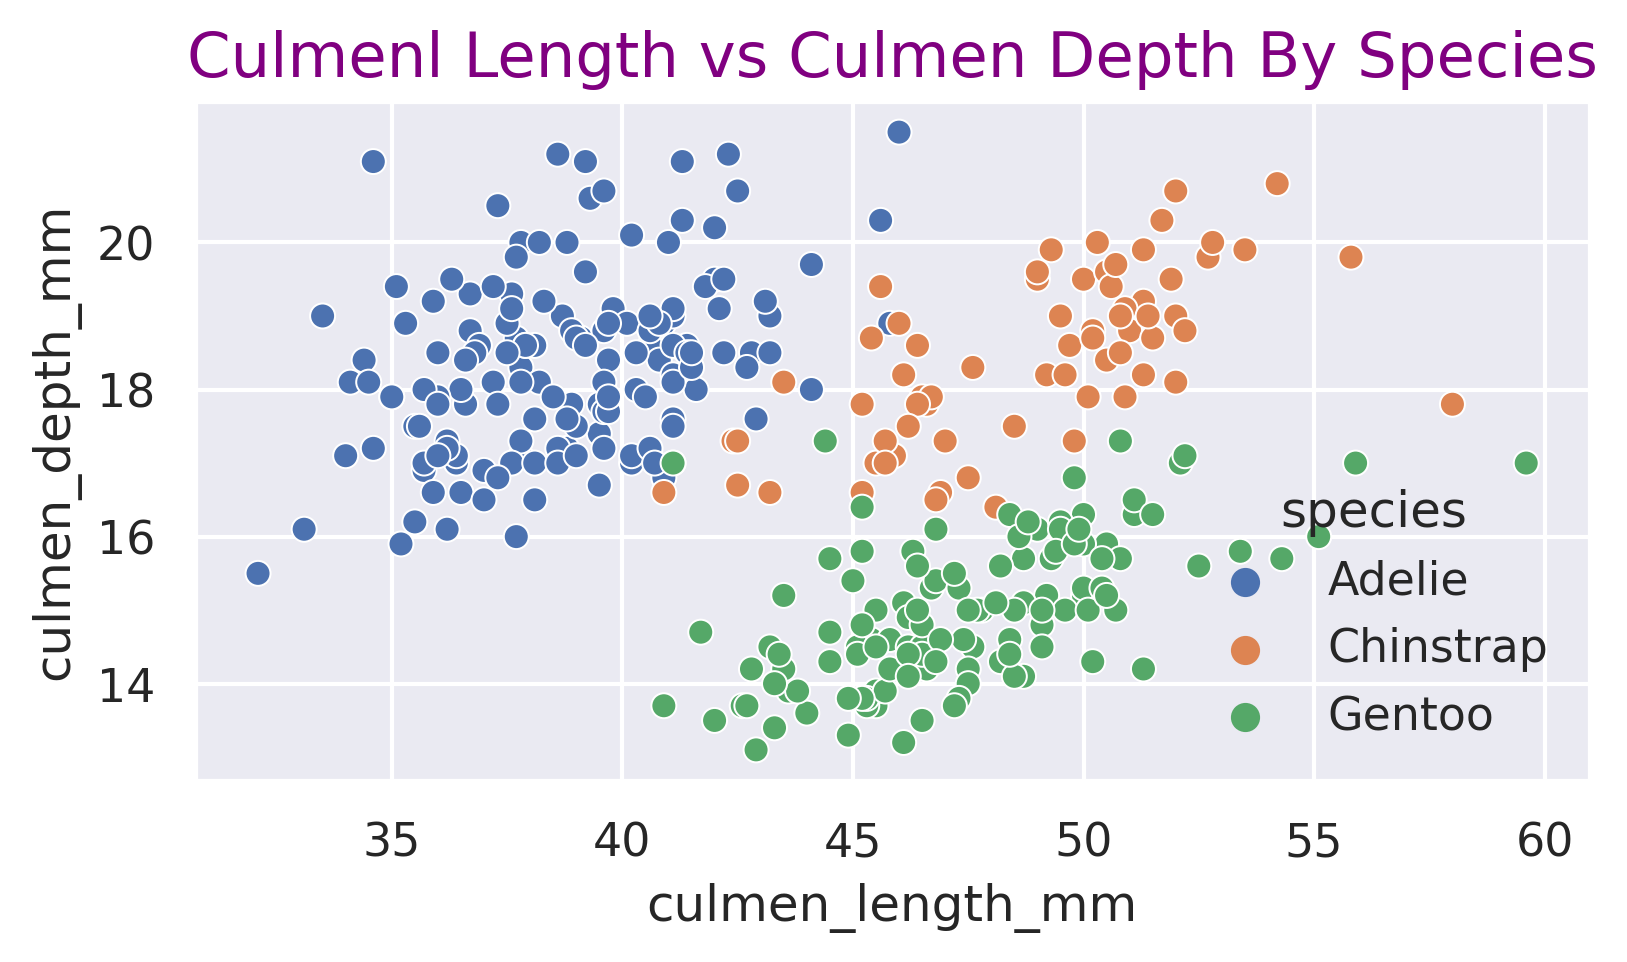

In [ ]:
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = df, hue = "species")
plt.title("Culmenl Length vs Culmen Depth By Species", size=15, color="purple")
plt.show()

* Adelie penguins have longer culmen depth than other species but they have short culmen lenght.
* Also Gentoo penguins have longer culmen lenght other species but they have short culmen depth.
* Chinstrap penguins culmen depths and lenghts more balanced than other species.

<a id = "15" ></a><br>
## island--culmen_length_mm/culmen_depth_mm

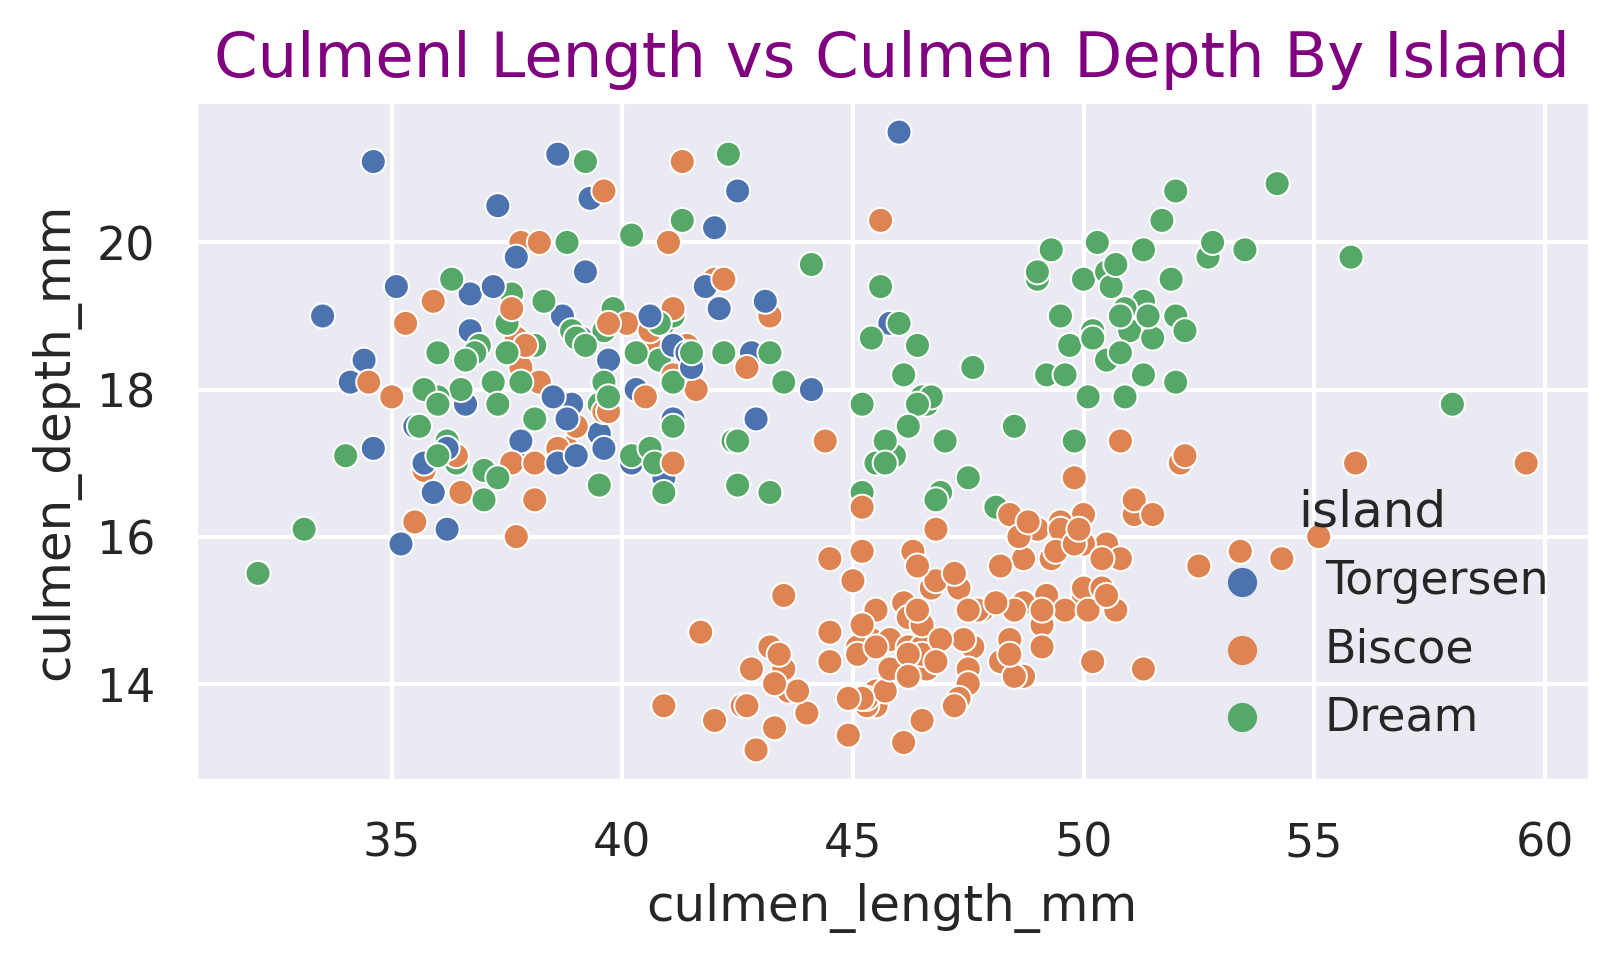

In [ ]:
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = df, hue = "island")
plt.title("Culmenl Length vs Culmen Depth By Island", size=15, color="purple")
plt.show()

* * Scatterin the graph is not certain but if culmen lenght little bit longer than others and also culmen depth is little bit shorter than others maybe we can say, it could be Biscoe island.

<a id = "16" ></a><br>
## species--flipper_length_mm

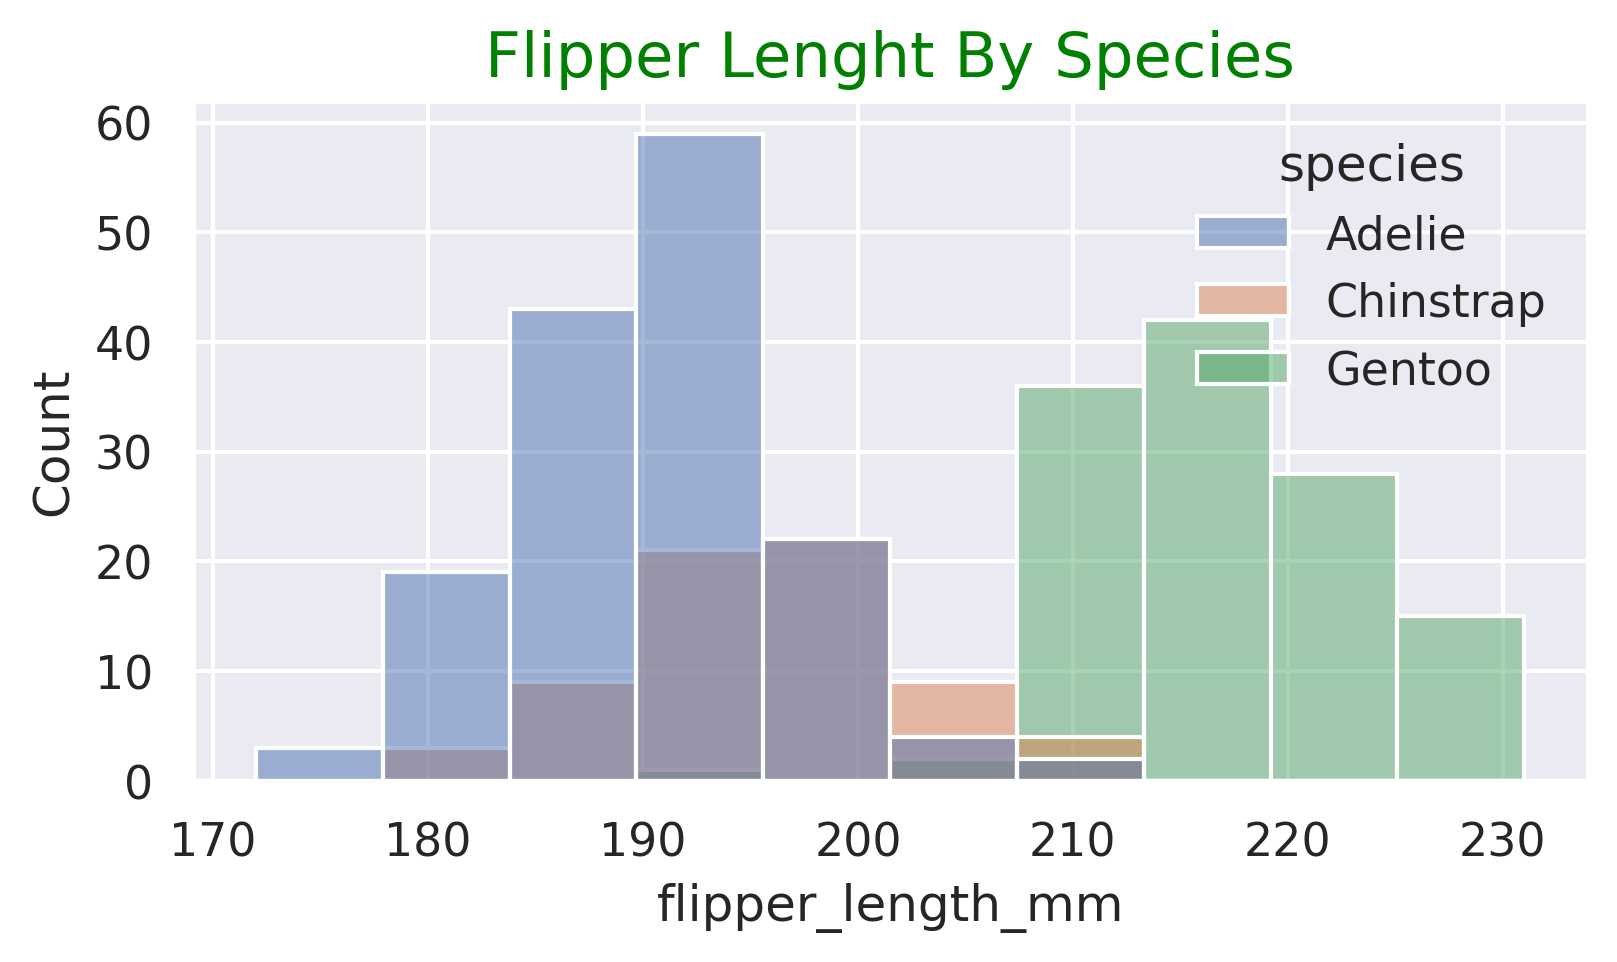

In [ ]:
sns.histplot(x = "flipper_length_mm", data = df, hue = "species")
plt.title("Flipper Lenght By Species", size=15, color="green")
plt.show()

* The Gentoo species got longer flipper_length_mm.
* All species common flipper_length_mm is in 190-200.
* Only Gentoo species has 220 and 230 flipper_length_mm.

<a id = "17" ></a><br>
## island--sex--flipper_length_mm

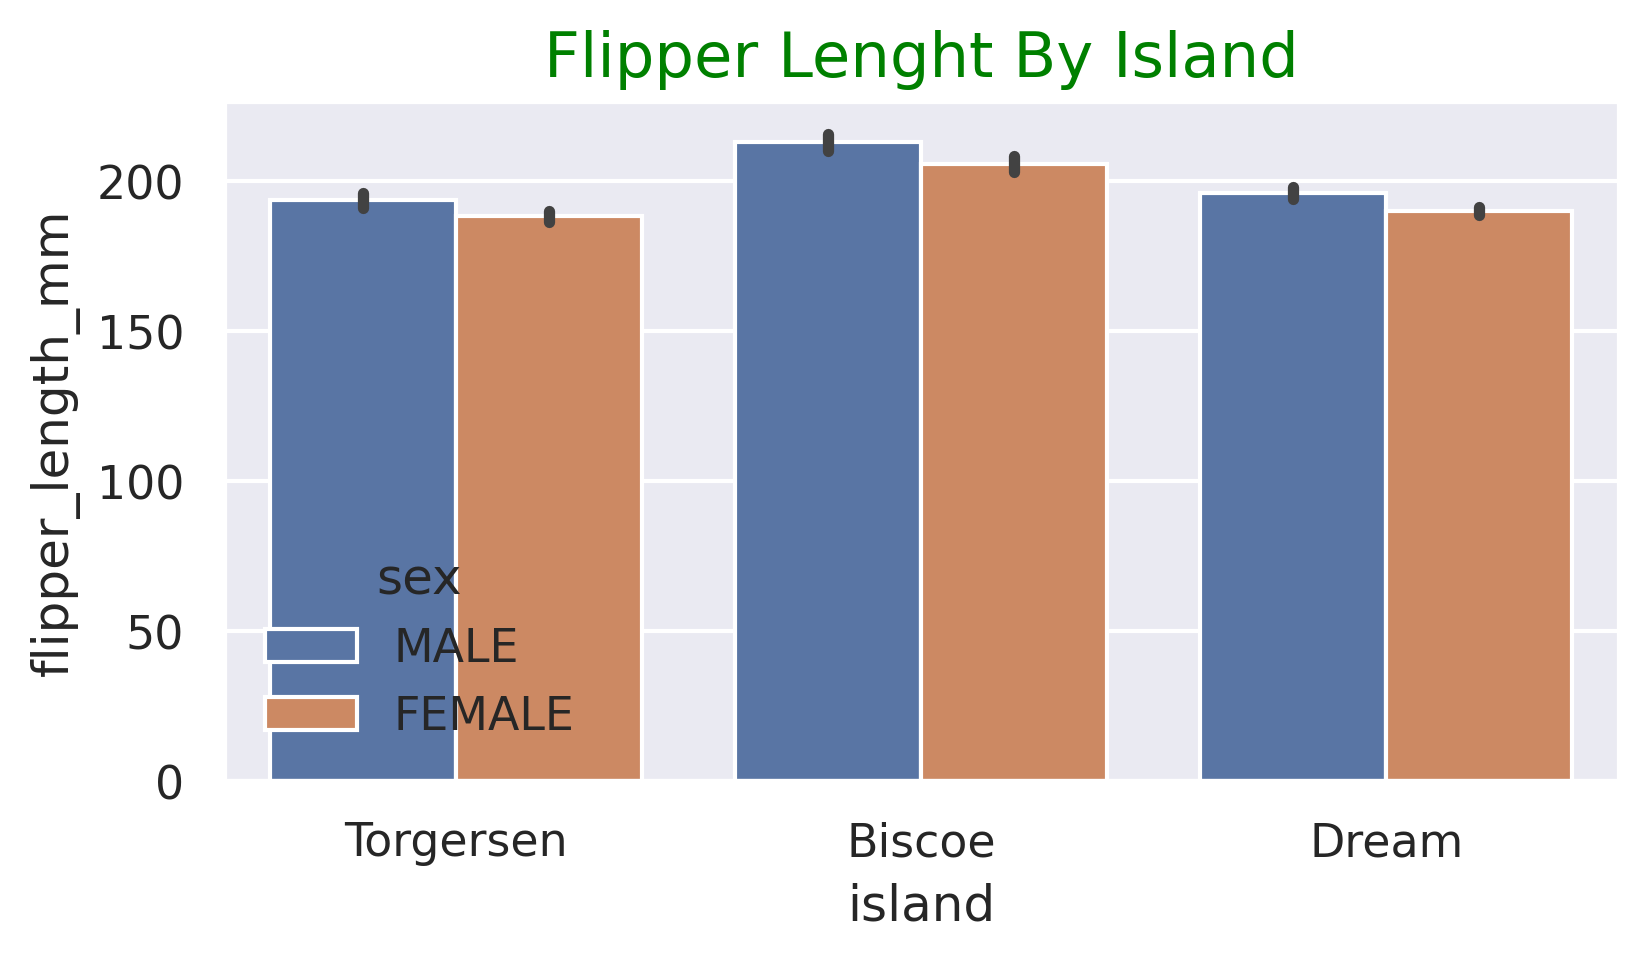

In [ ]:
sns.barplot(x = "island", y = "flipper_length_mm", data = df, hue = "sex")
plt.title("Flipper Lenght By Island", size=15, color="green")
plt.show()

* Biscoe island has little bit longer flipper_length_mm than other.

<a id = "18" ></a><br>
## species--body_mass_g

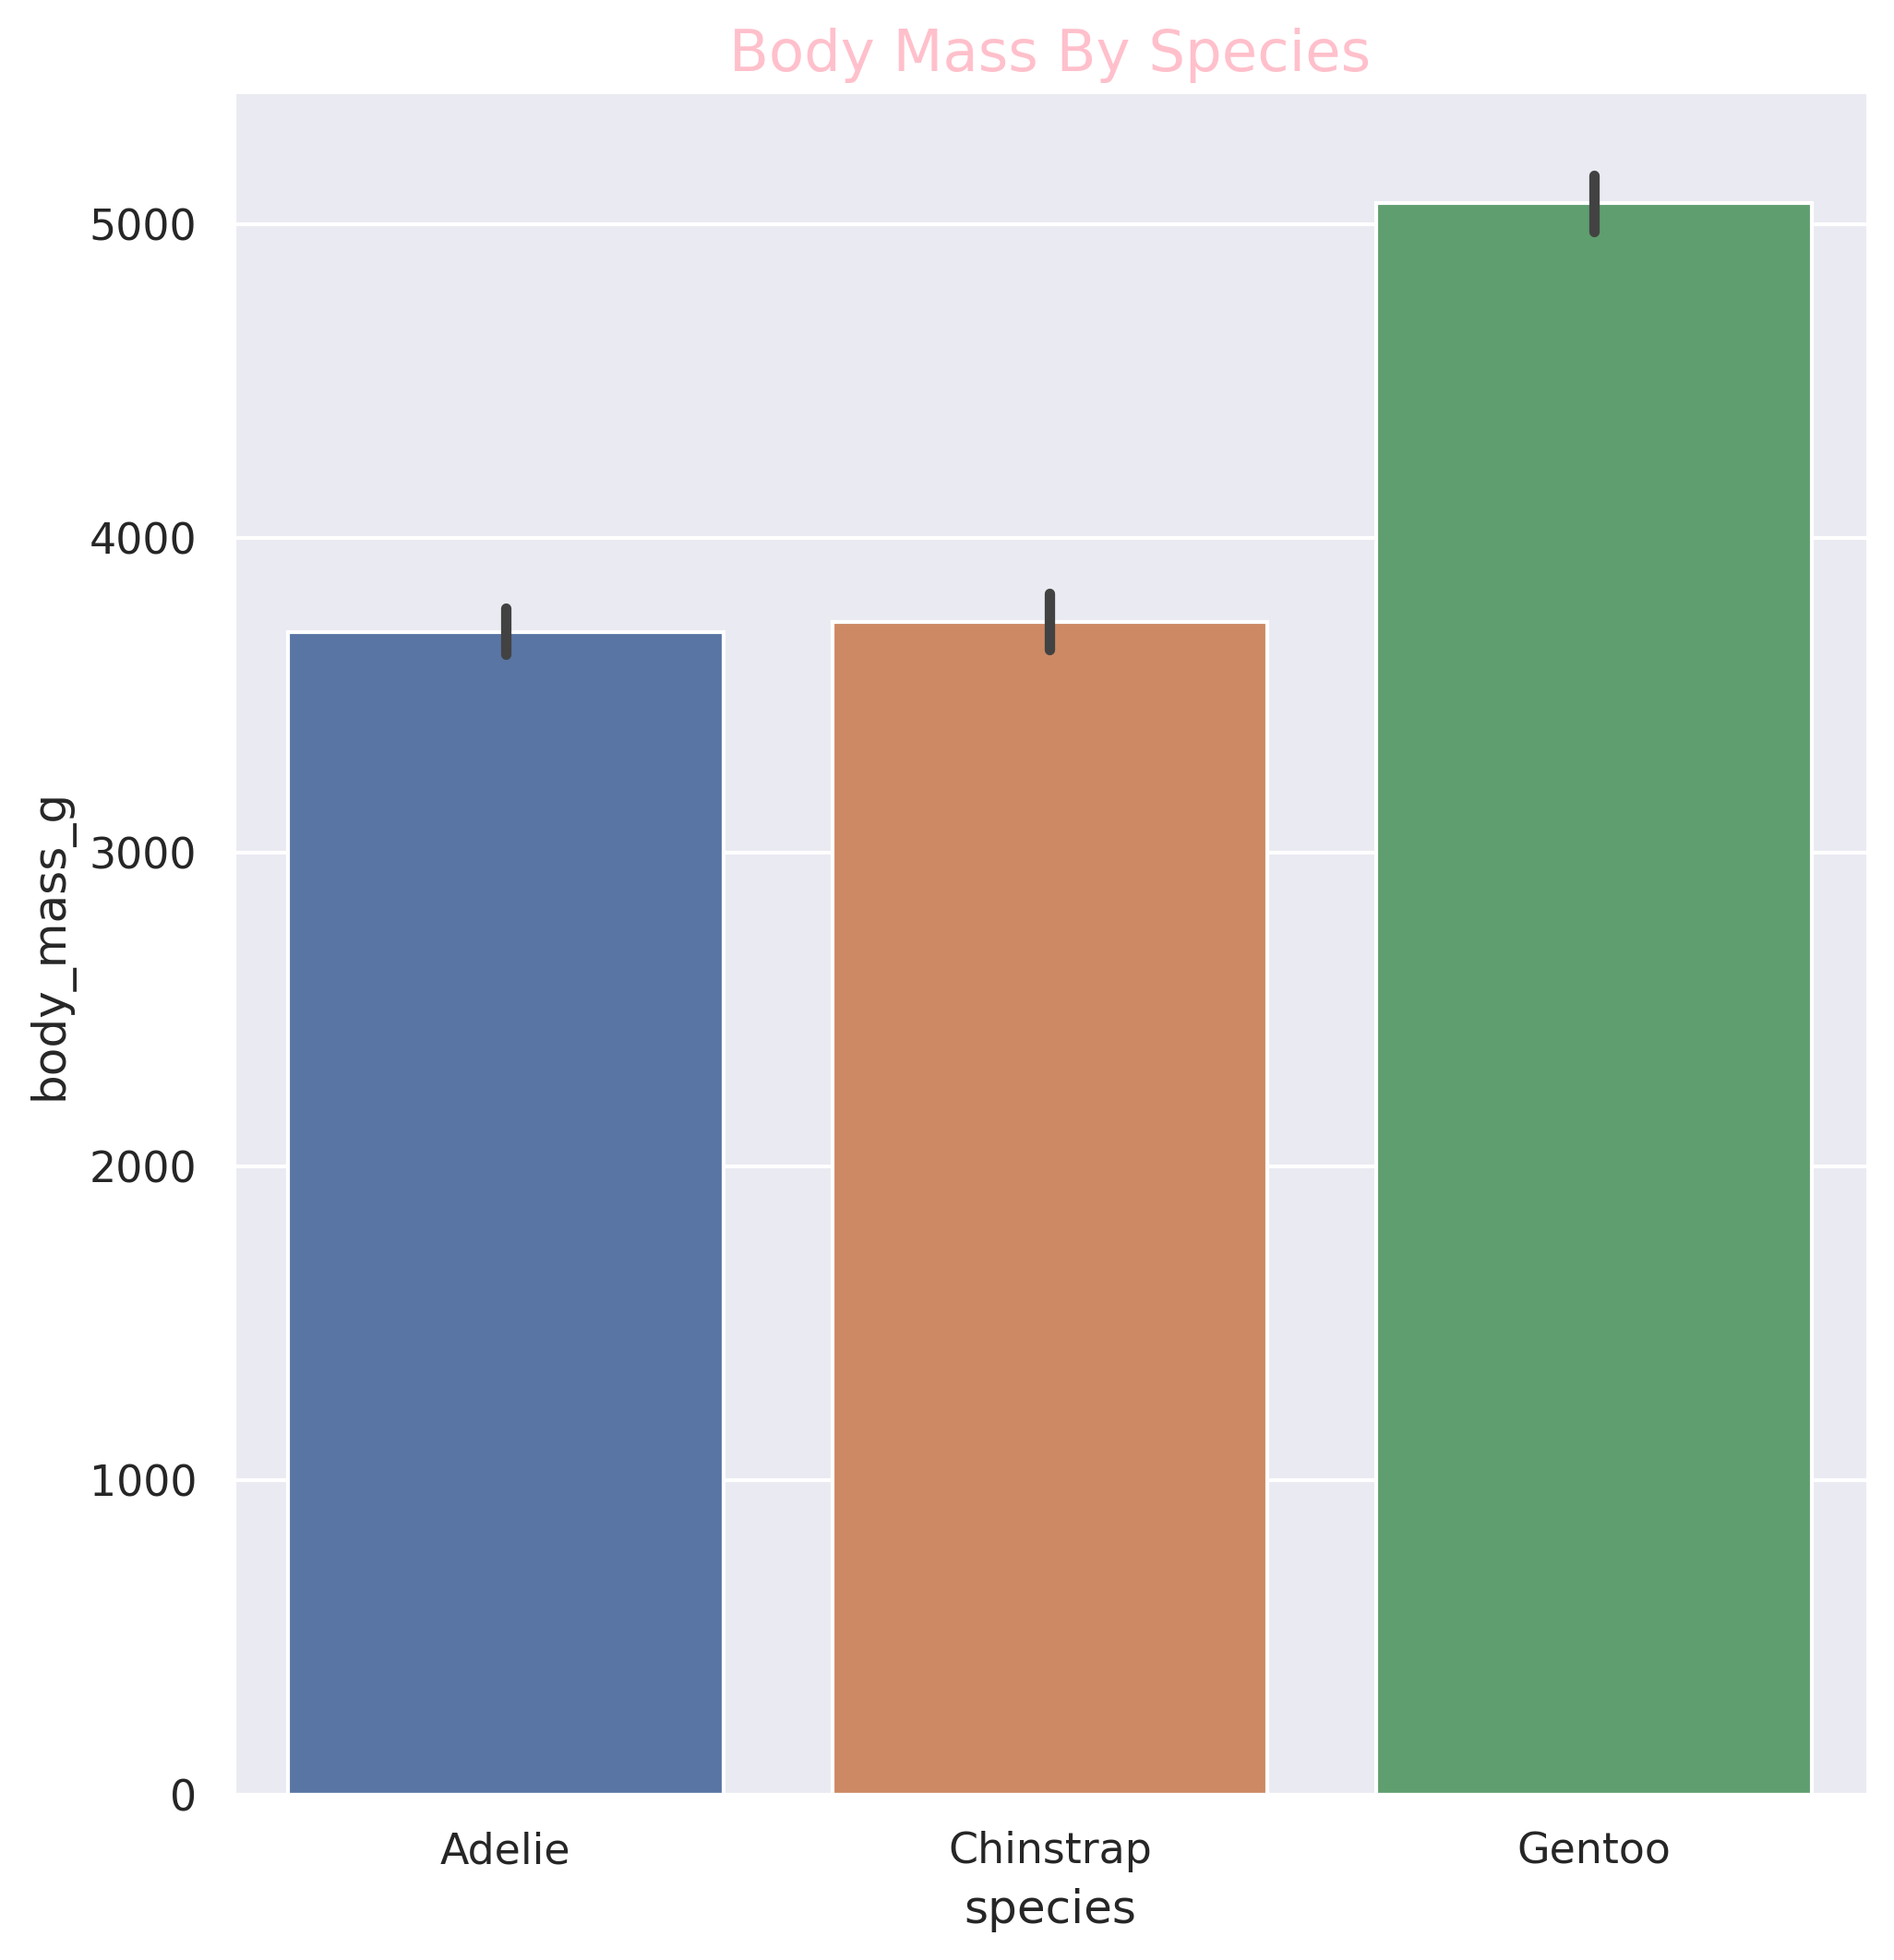

In [ ]:
g = sns.factorplot(x = "species", y = "body_mass_g", kind = "bar",data = df, size = 7 )
plt.title("Body Mass By Species", size=15, color="pink")
plt.show()

* Gentoo has biggest body_mass_g.
* Adelie and Chinstrap are close to each other.

<a id = "19" ></a><br>
## island--body_mass_g

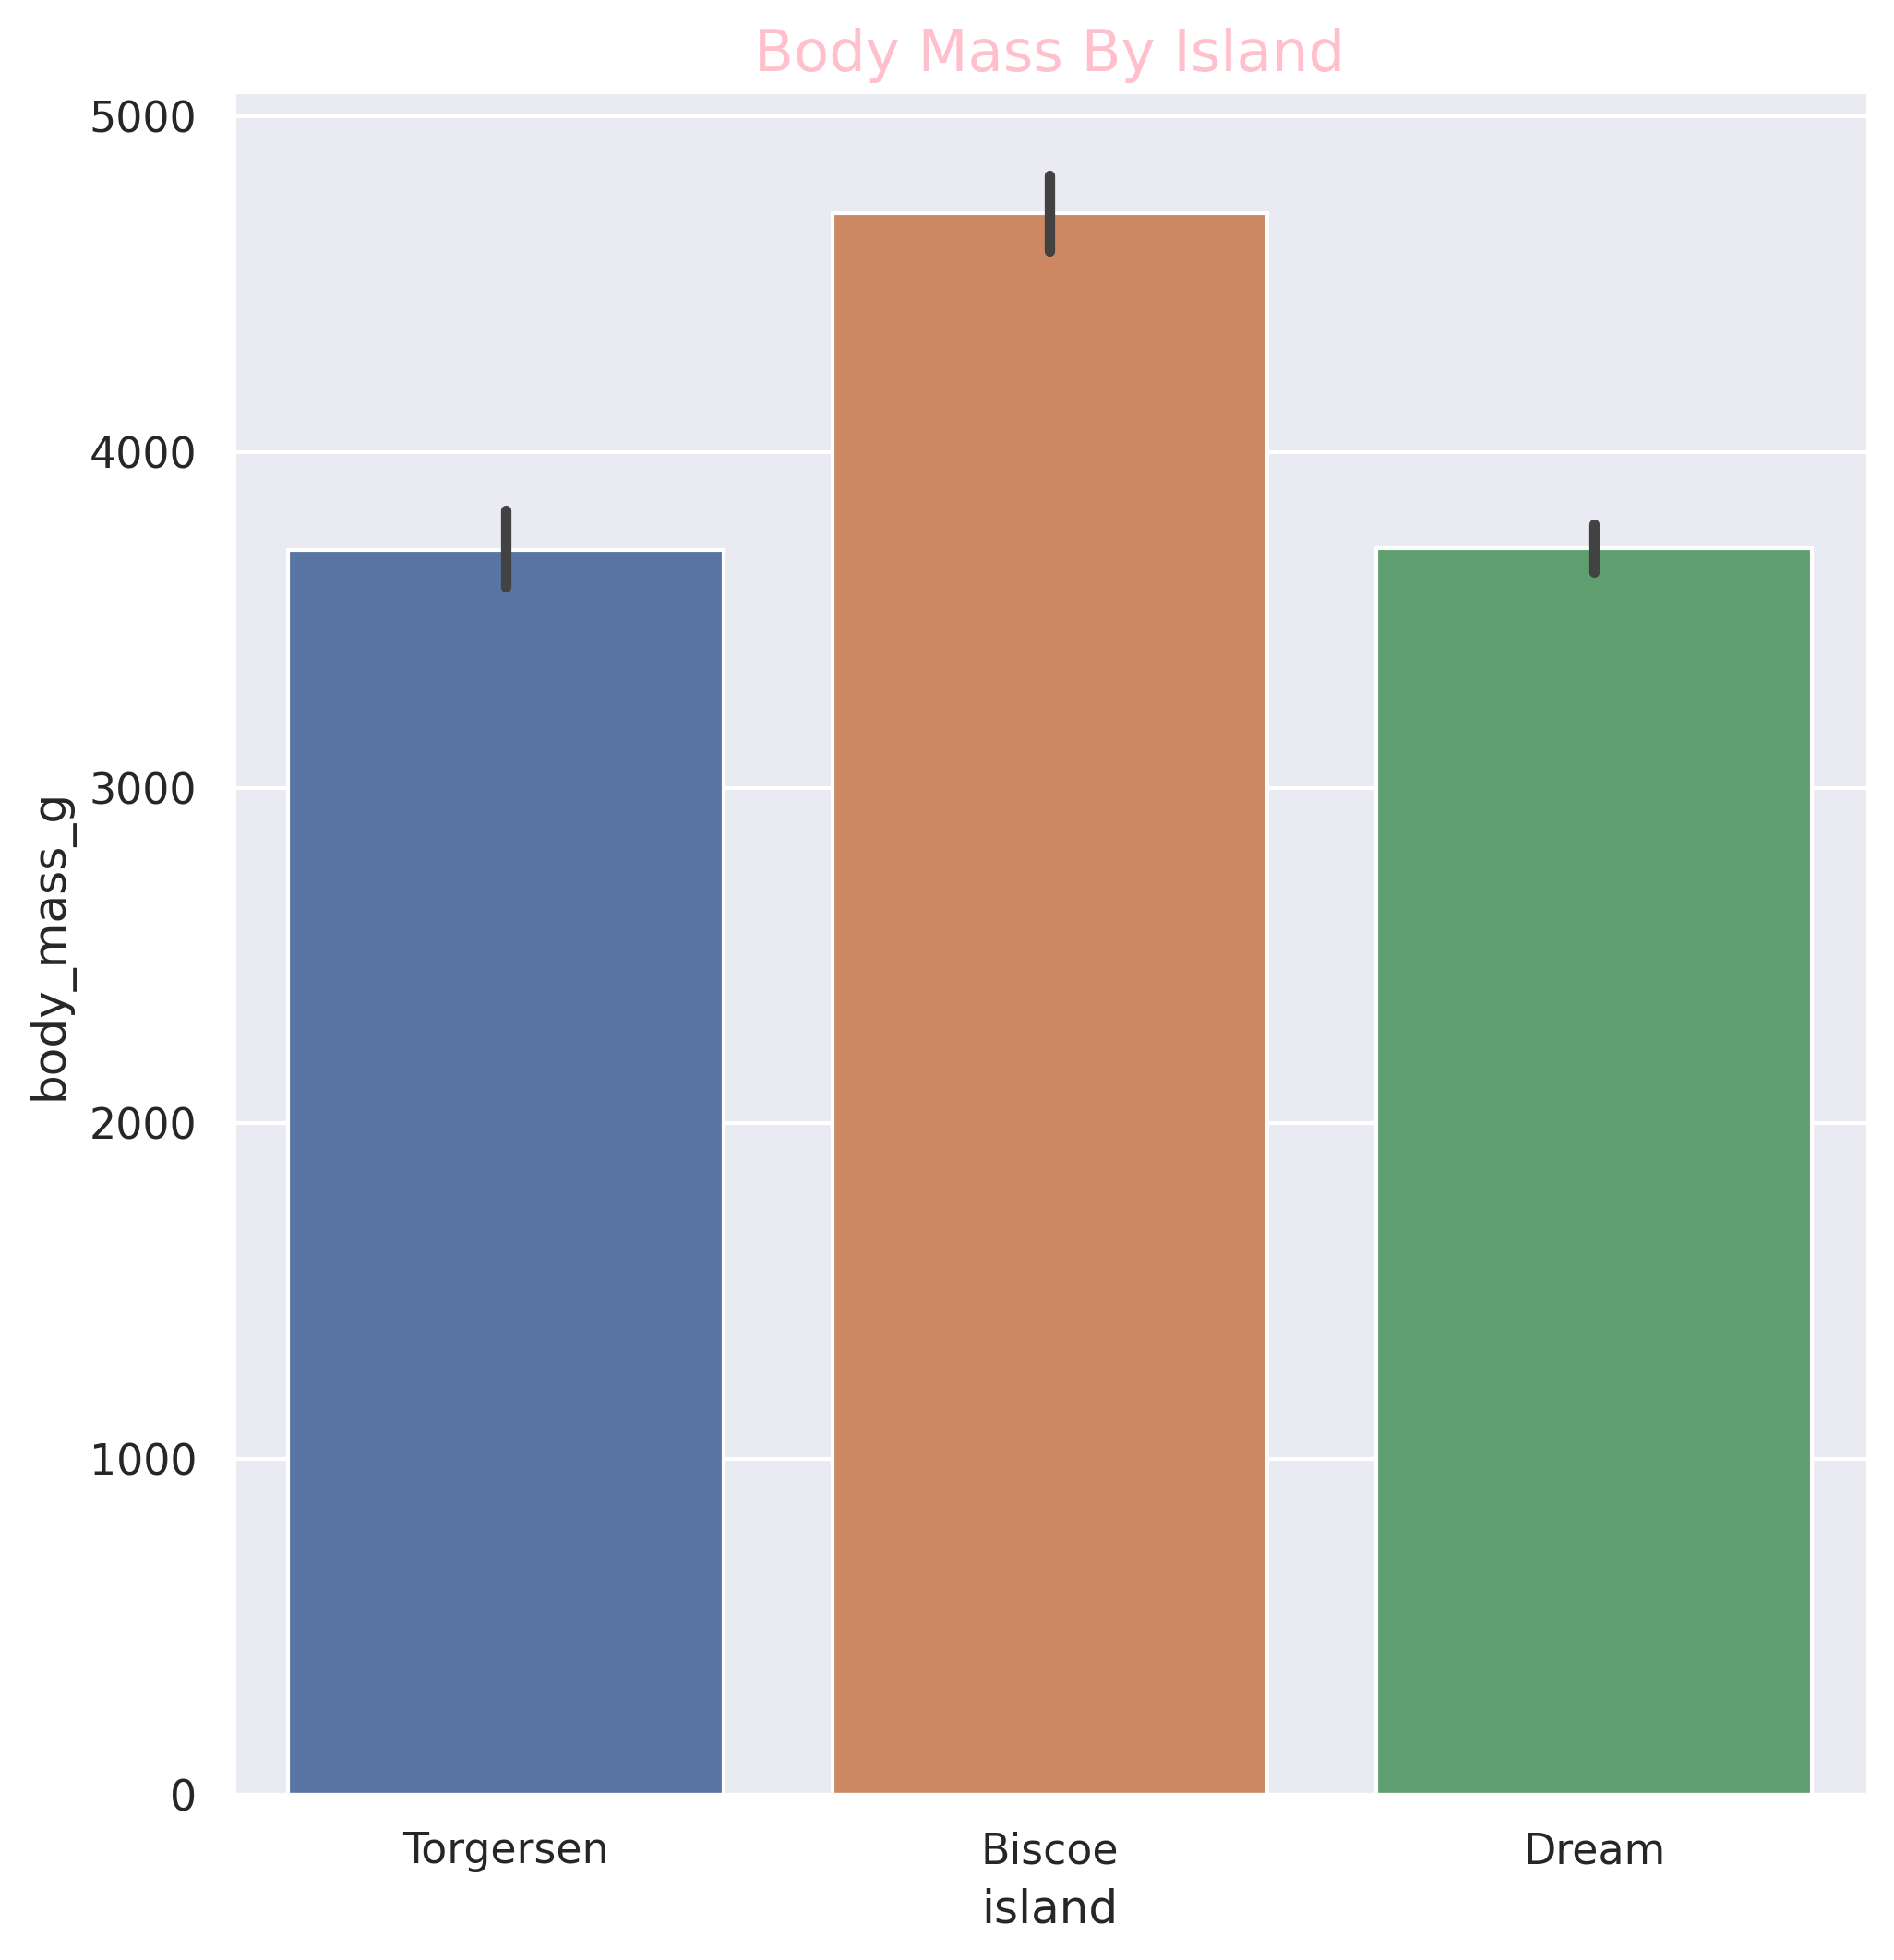

In [ ]:
g = sns.factorplot(x = "island", y = "body_mass_g", kind = "bar",data = df, size = 7 )
plt.title("Body Mass By Island", size=15, color="pink")
plt.show()

* Biscoe has biggest body_mass_g.
* Torgersen and Dream are close to each other.

<a id = "20" ></a><br>
## island-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

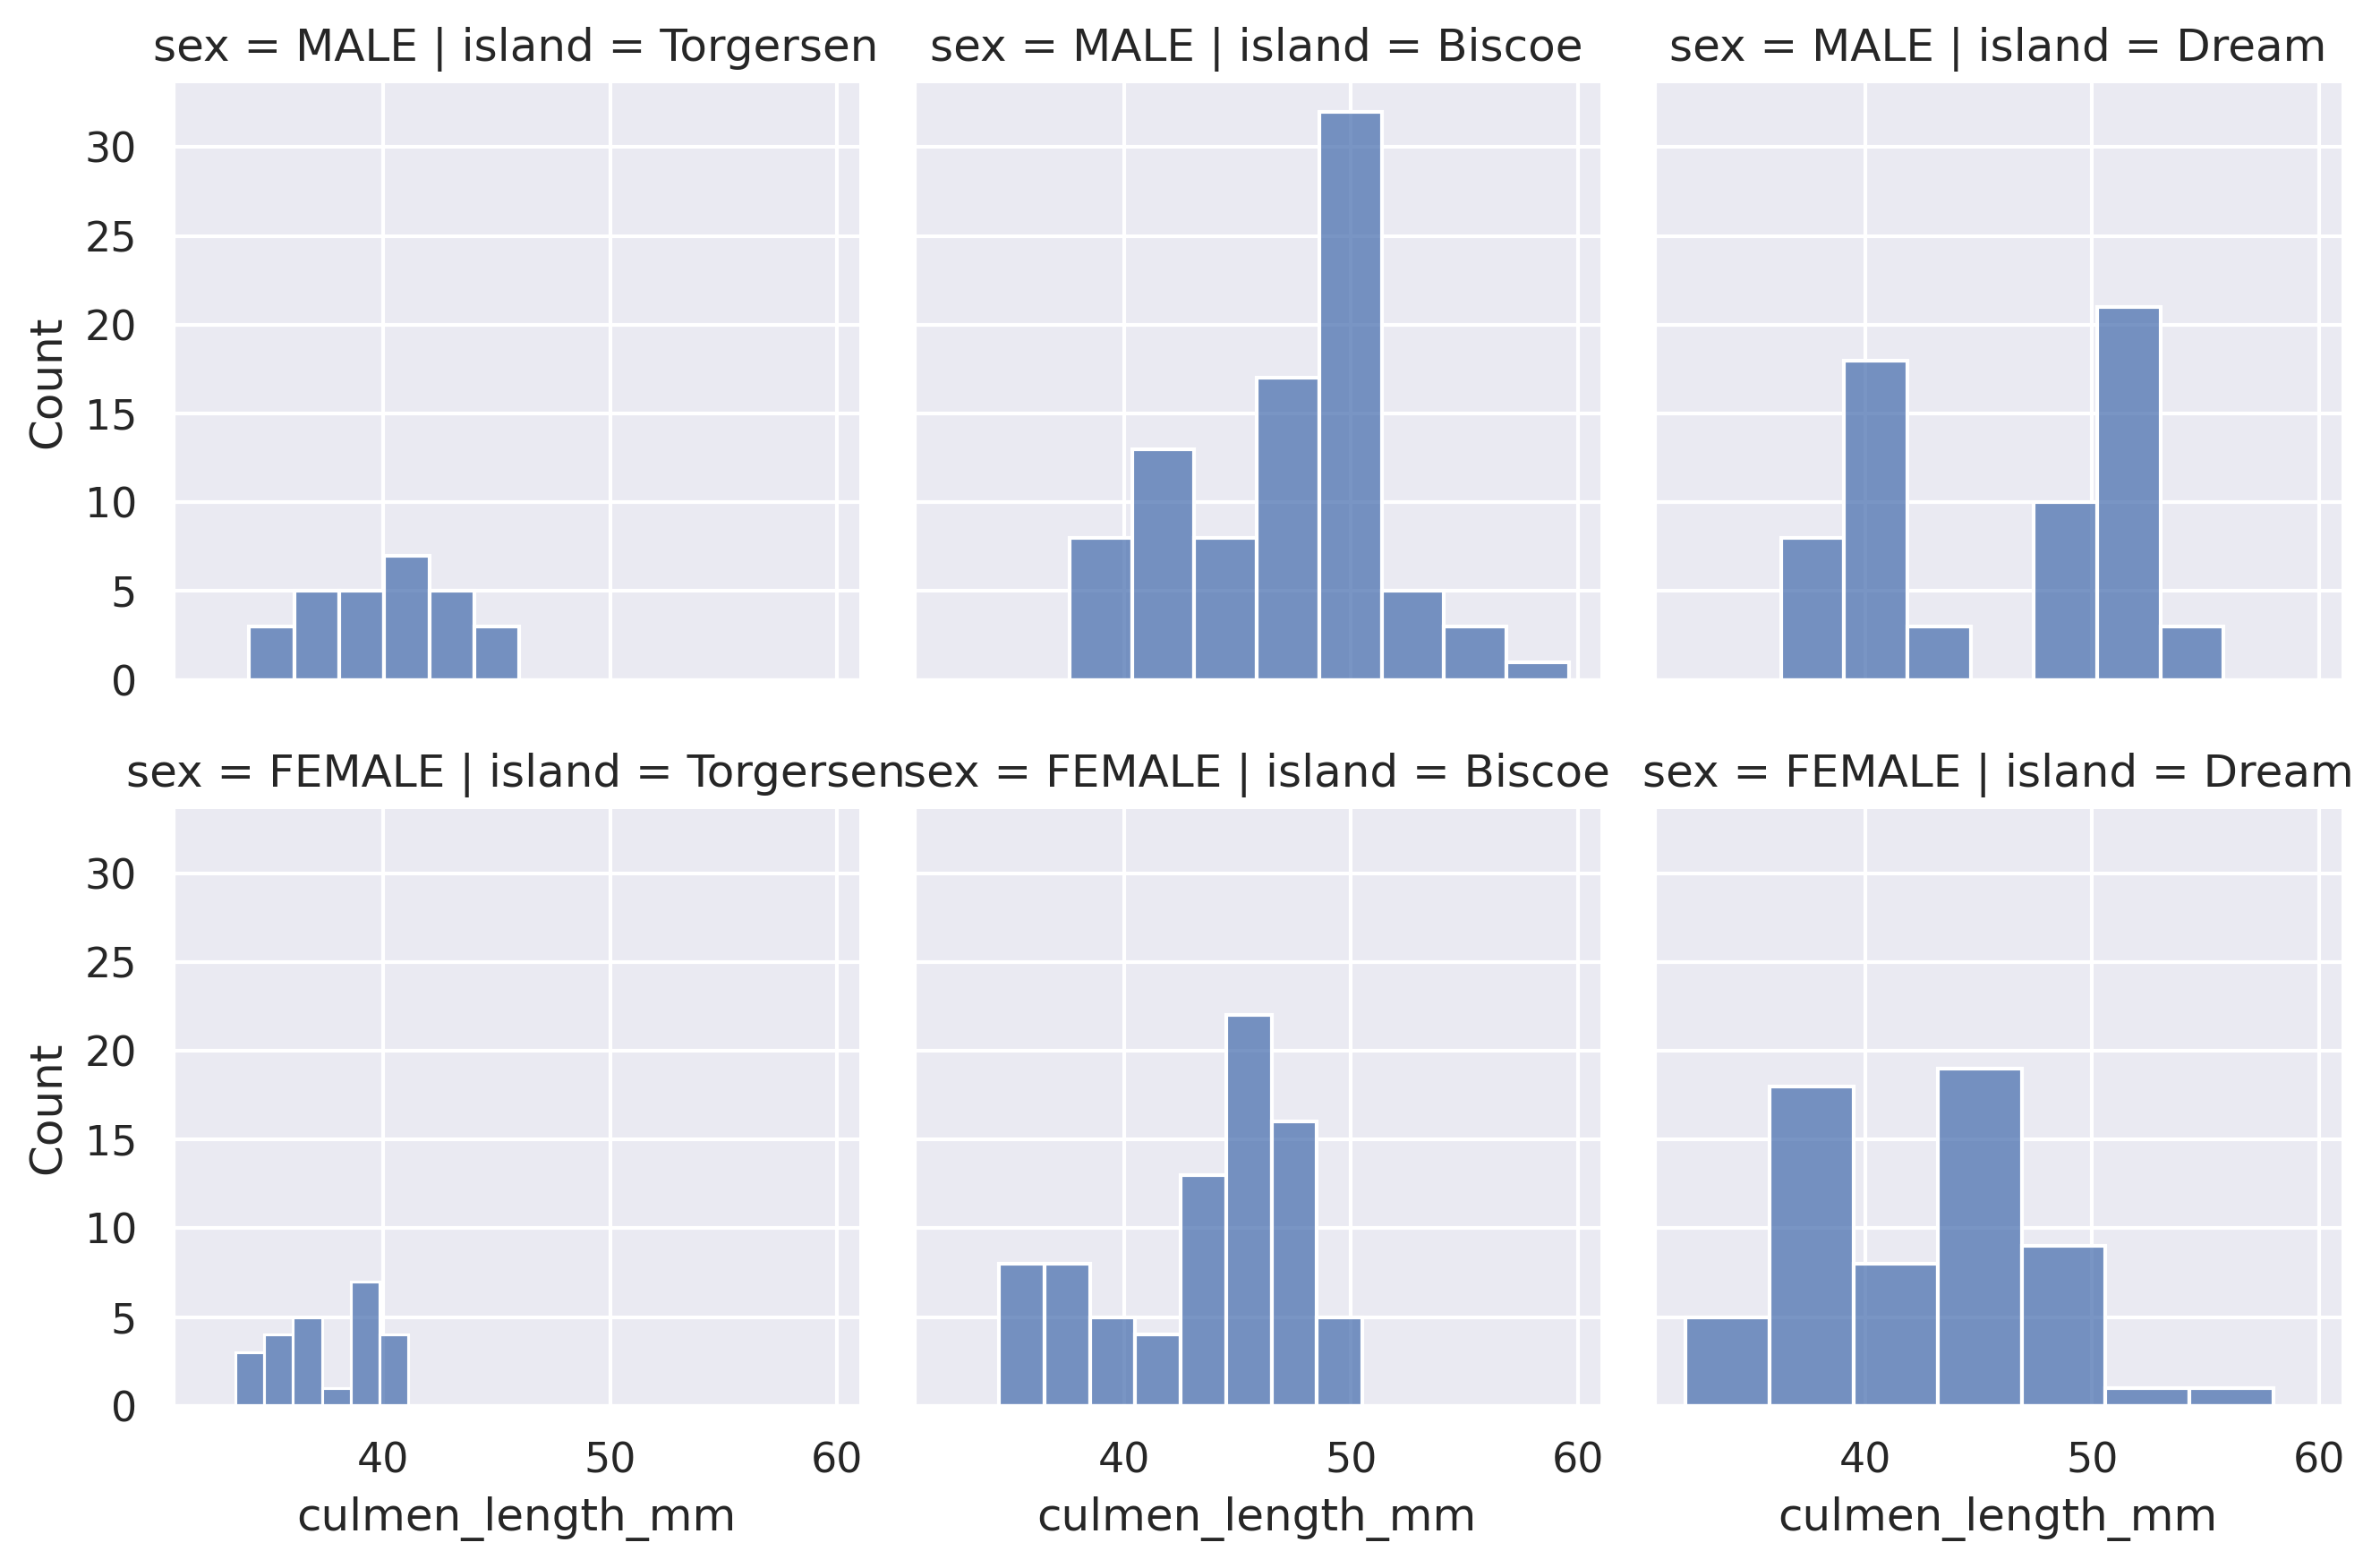

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

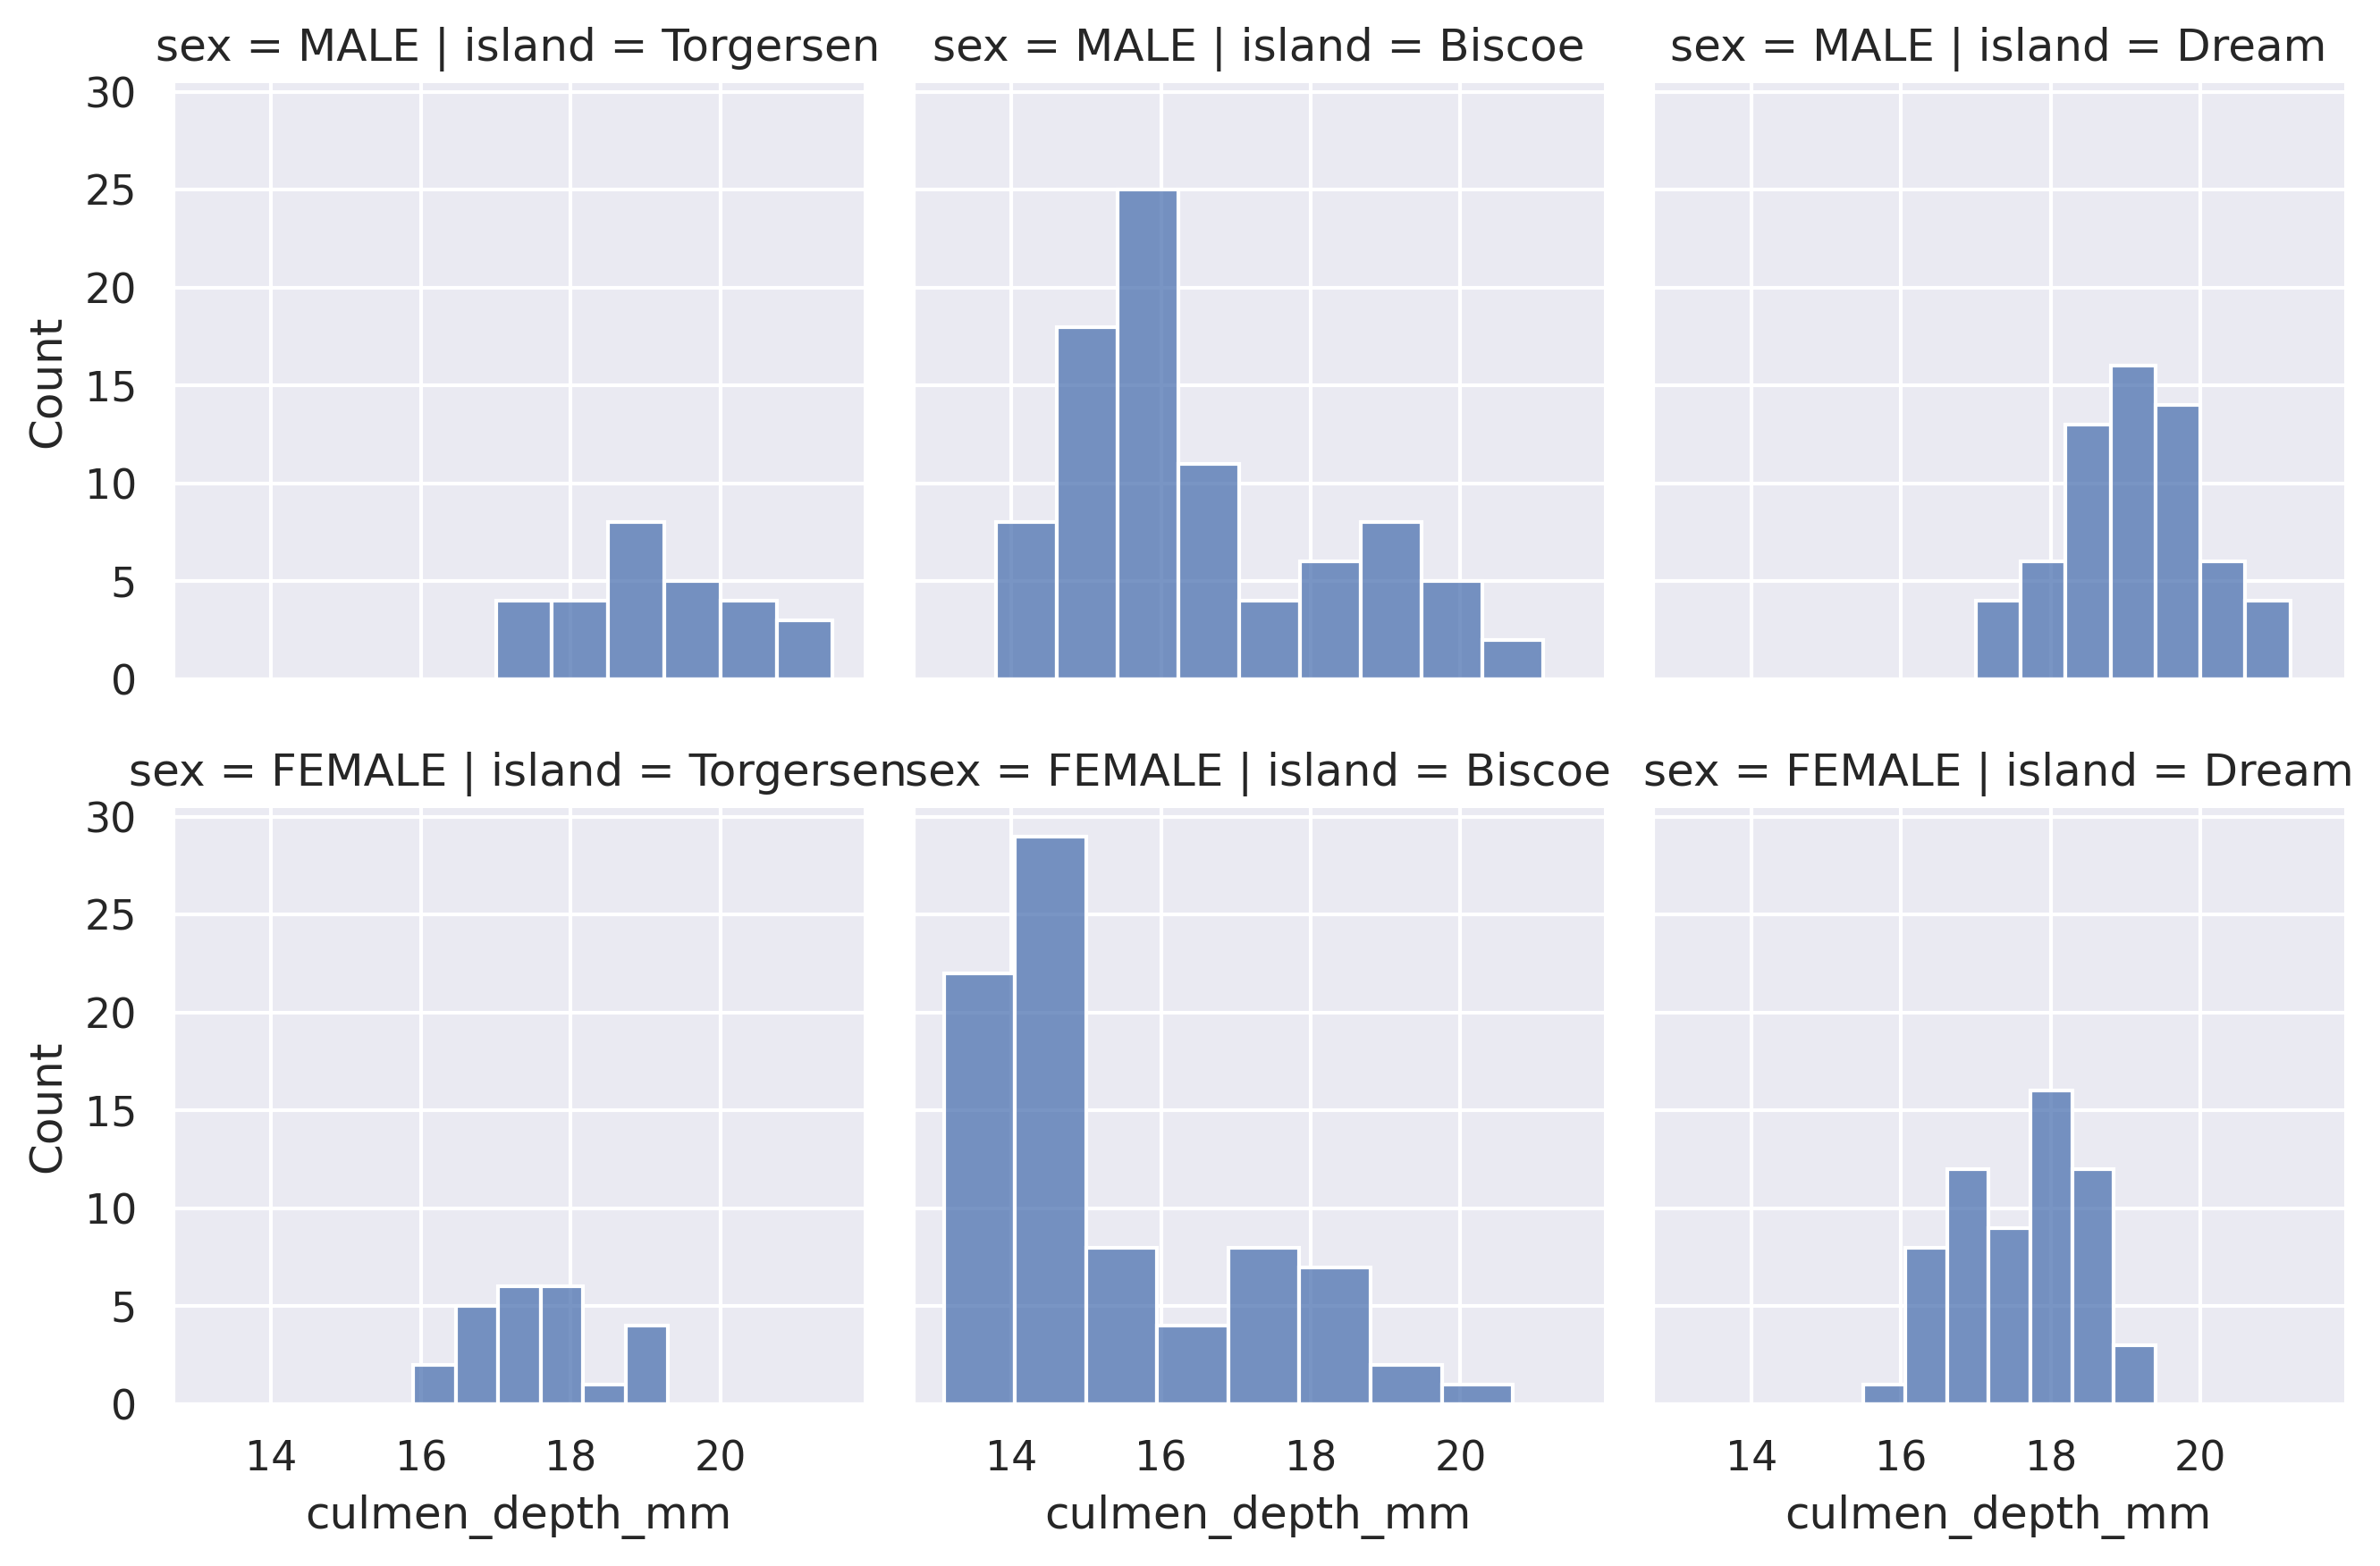

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

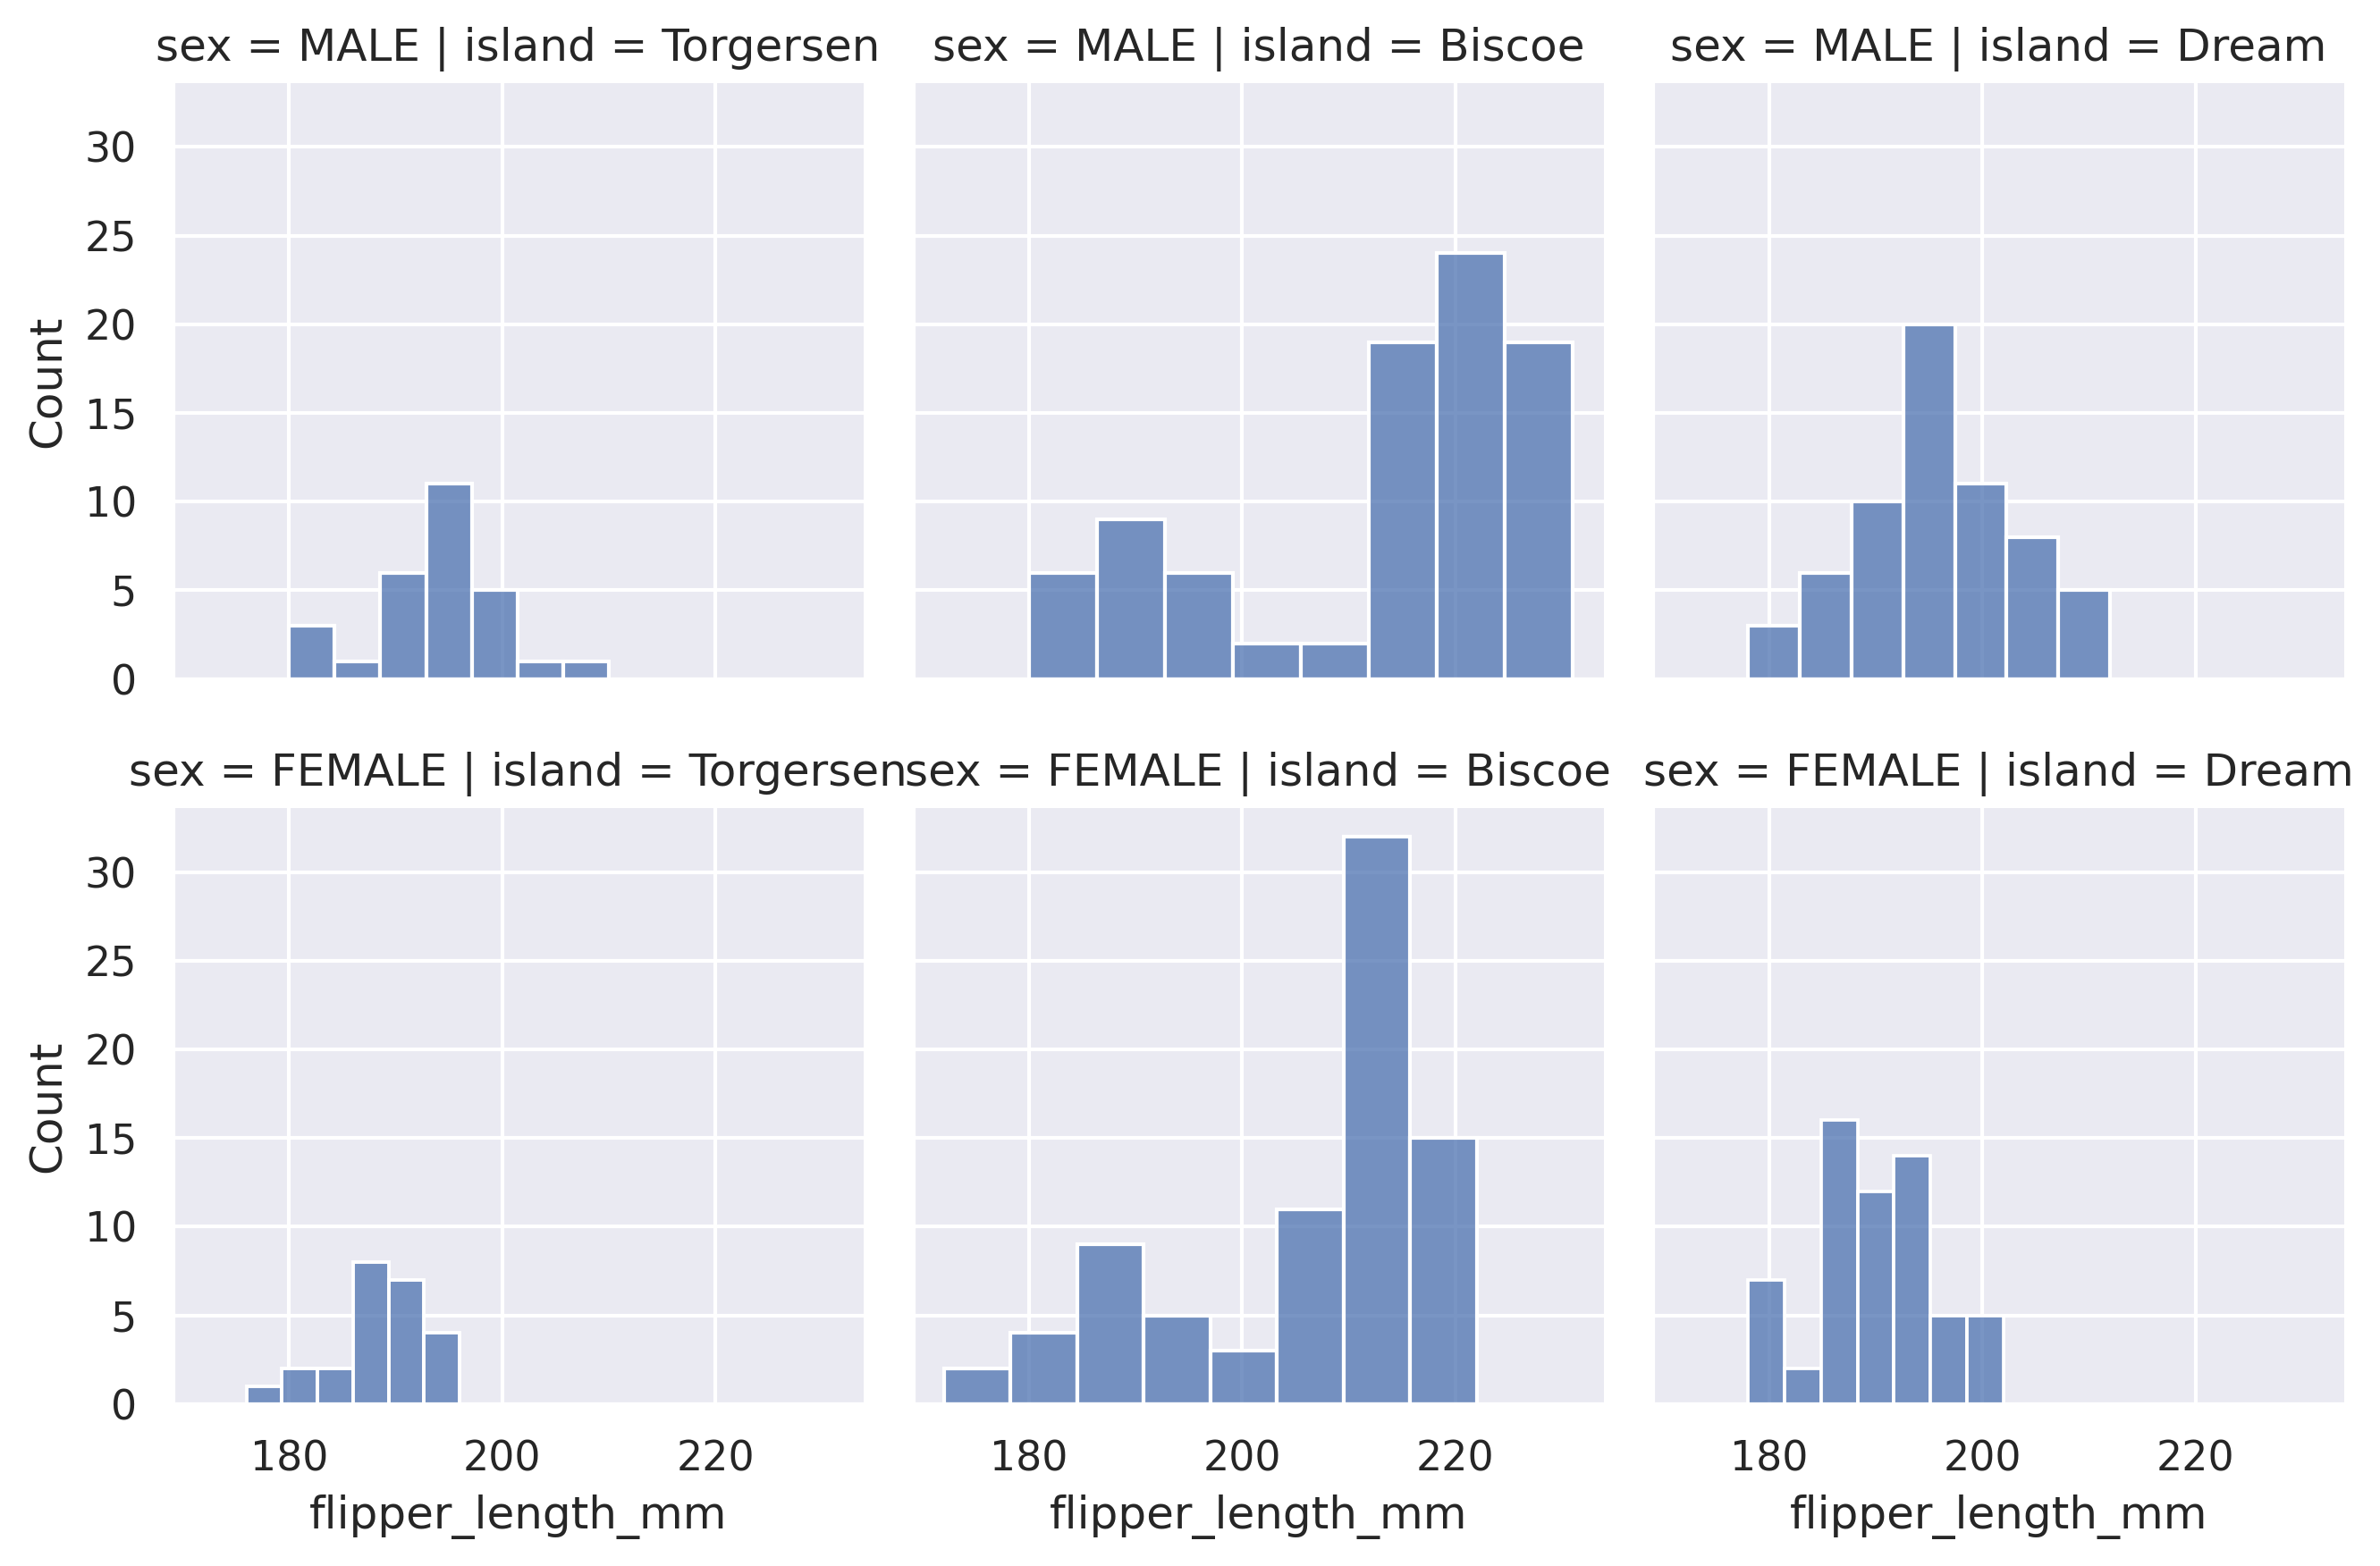

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "flipper_length_mm")
plt.show()

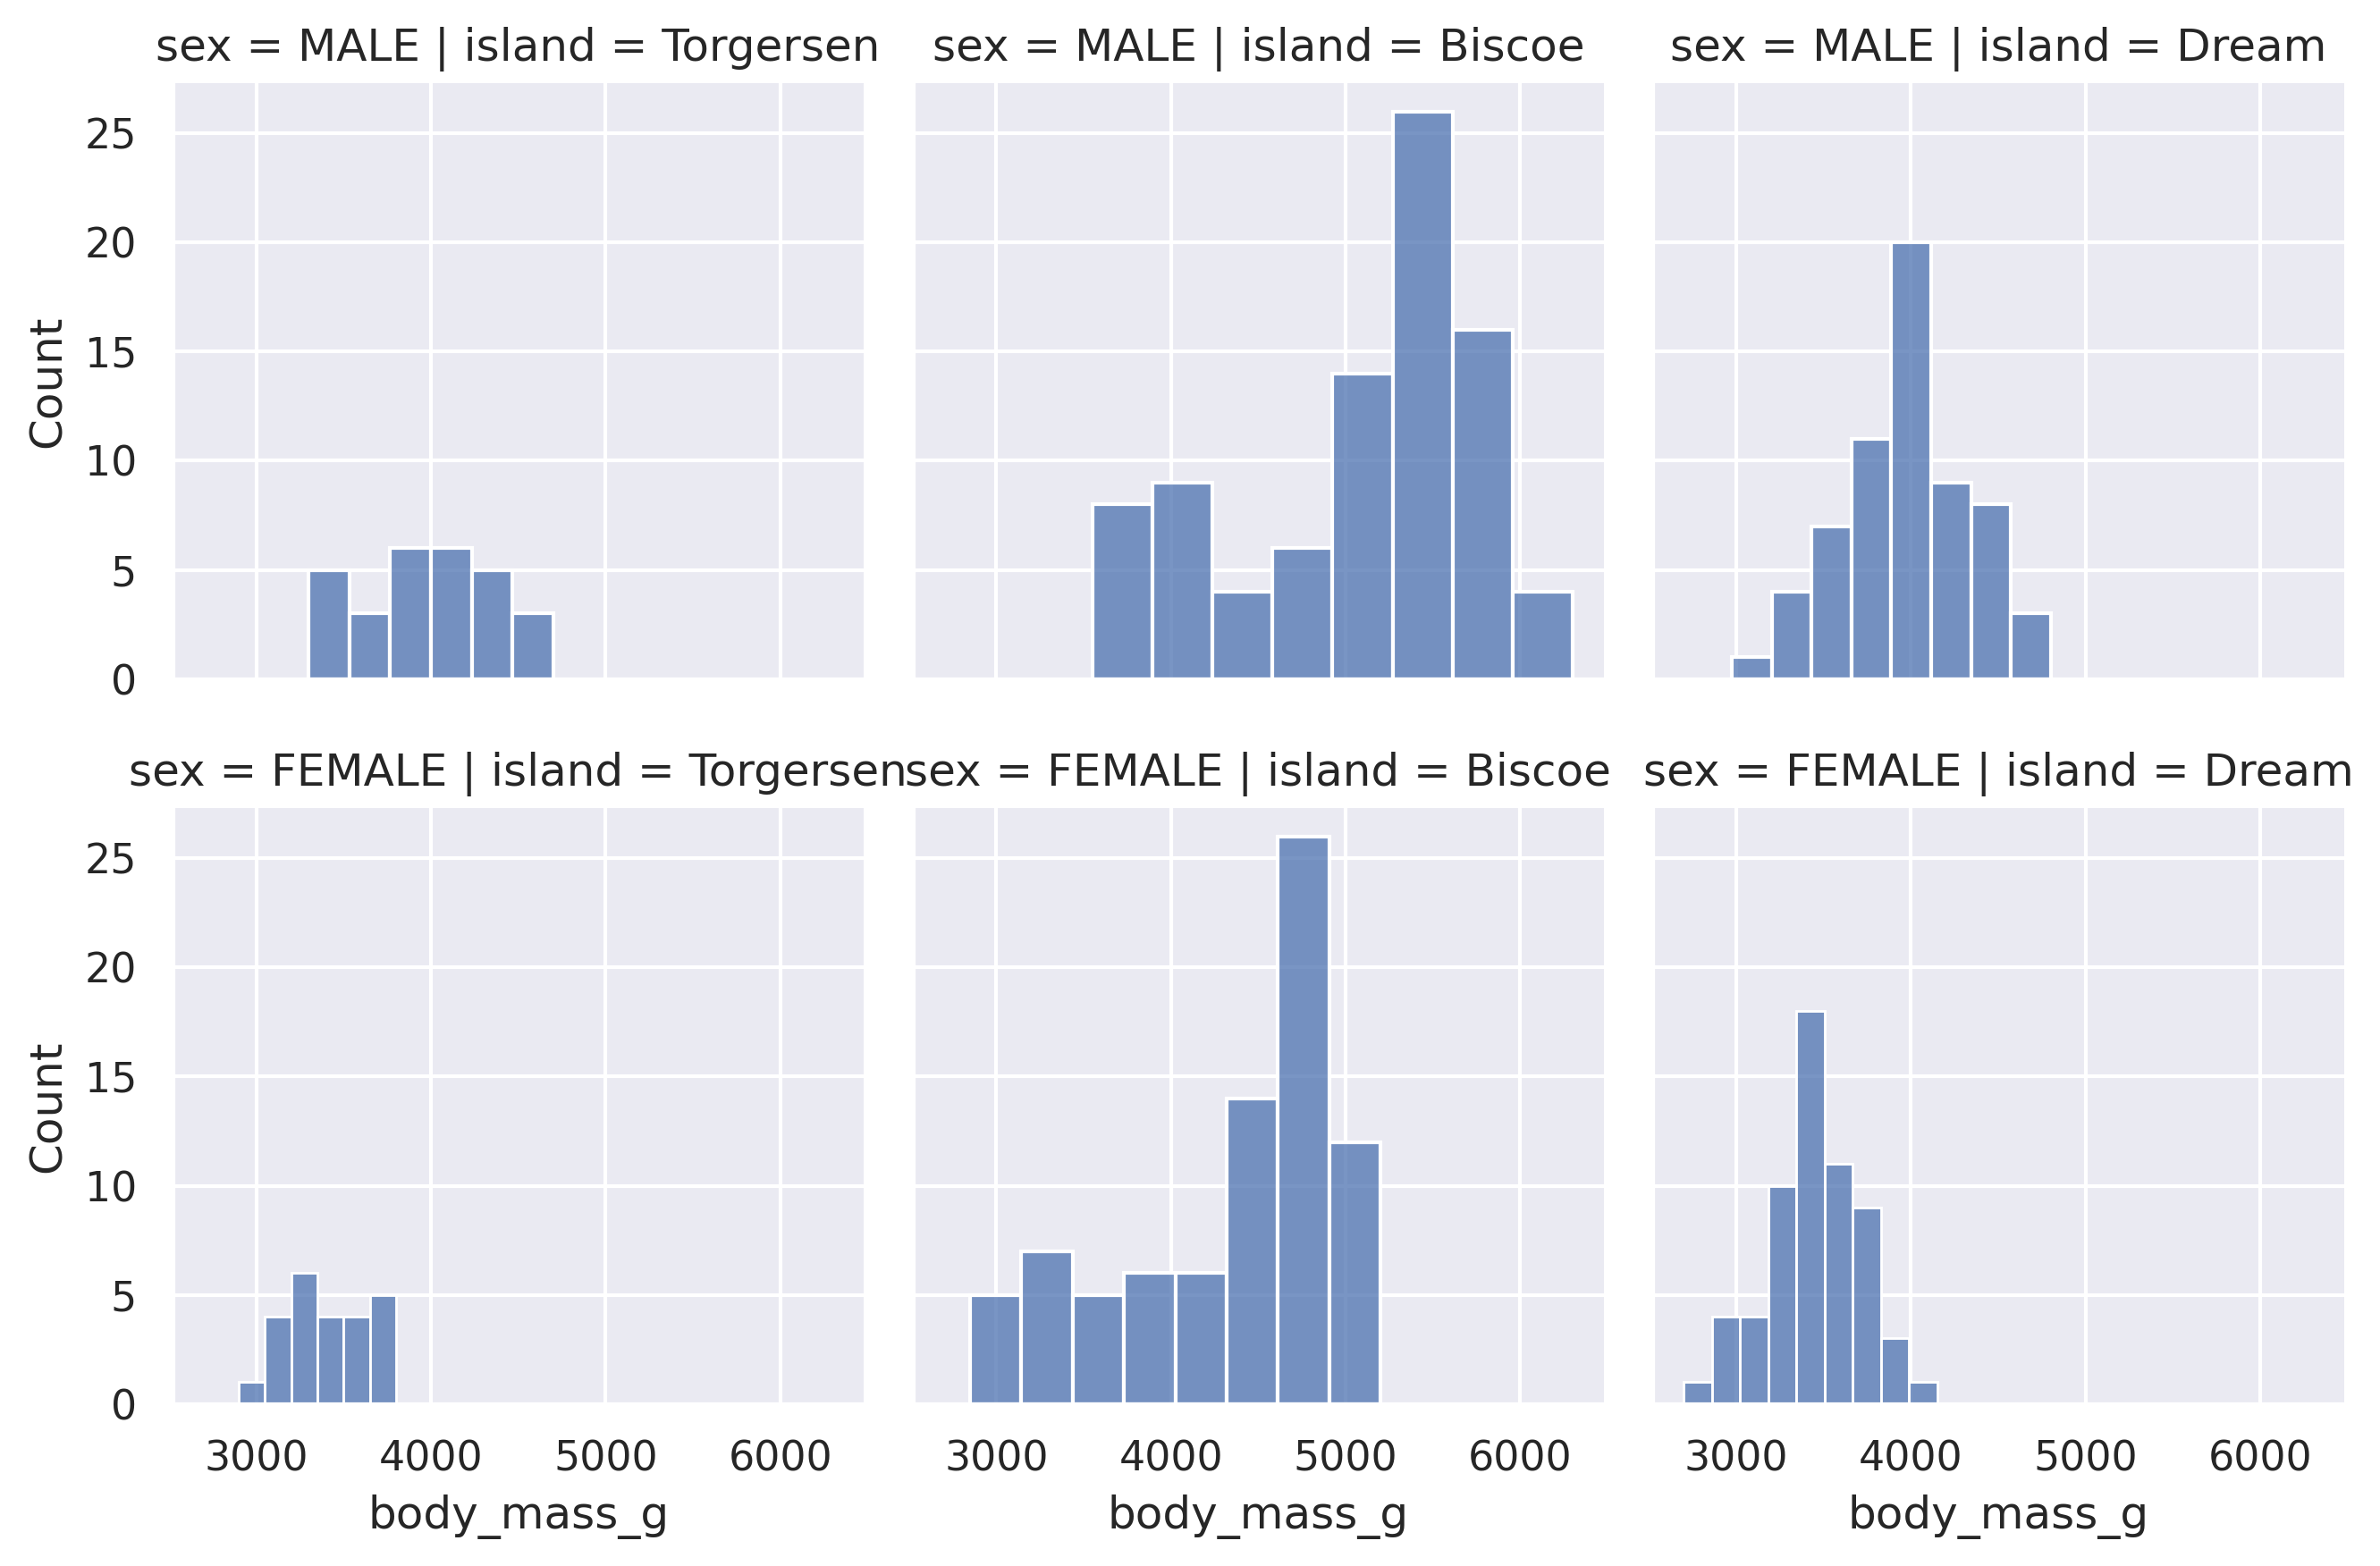

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "body_mass_g")
plt.show()

* We can see all numeric columns about island in bulk from this hist graphs.

<a id = "21" ></a><br>
## species-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

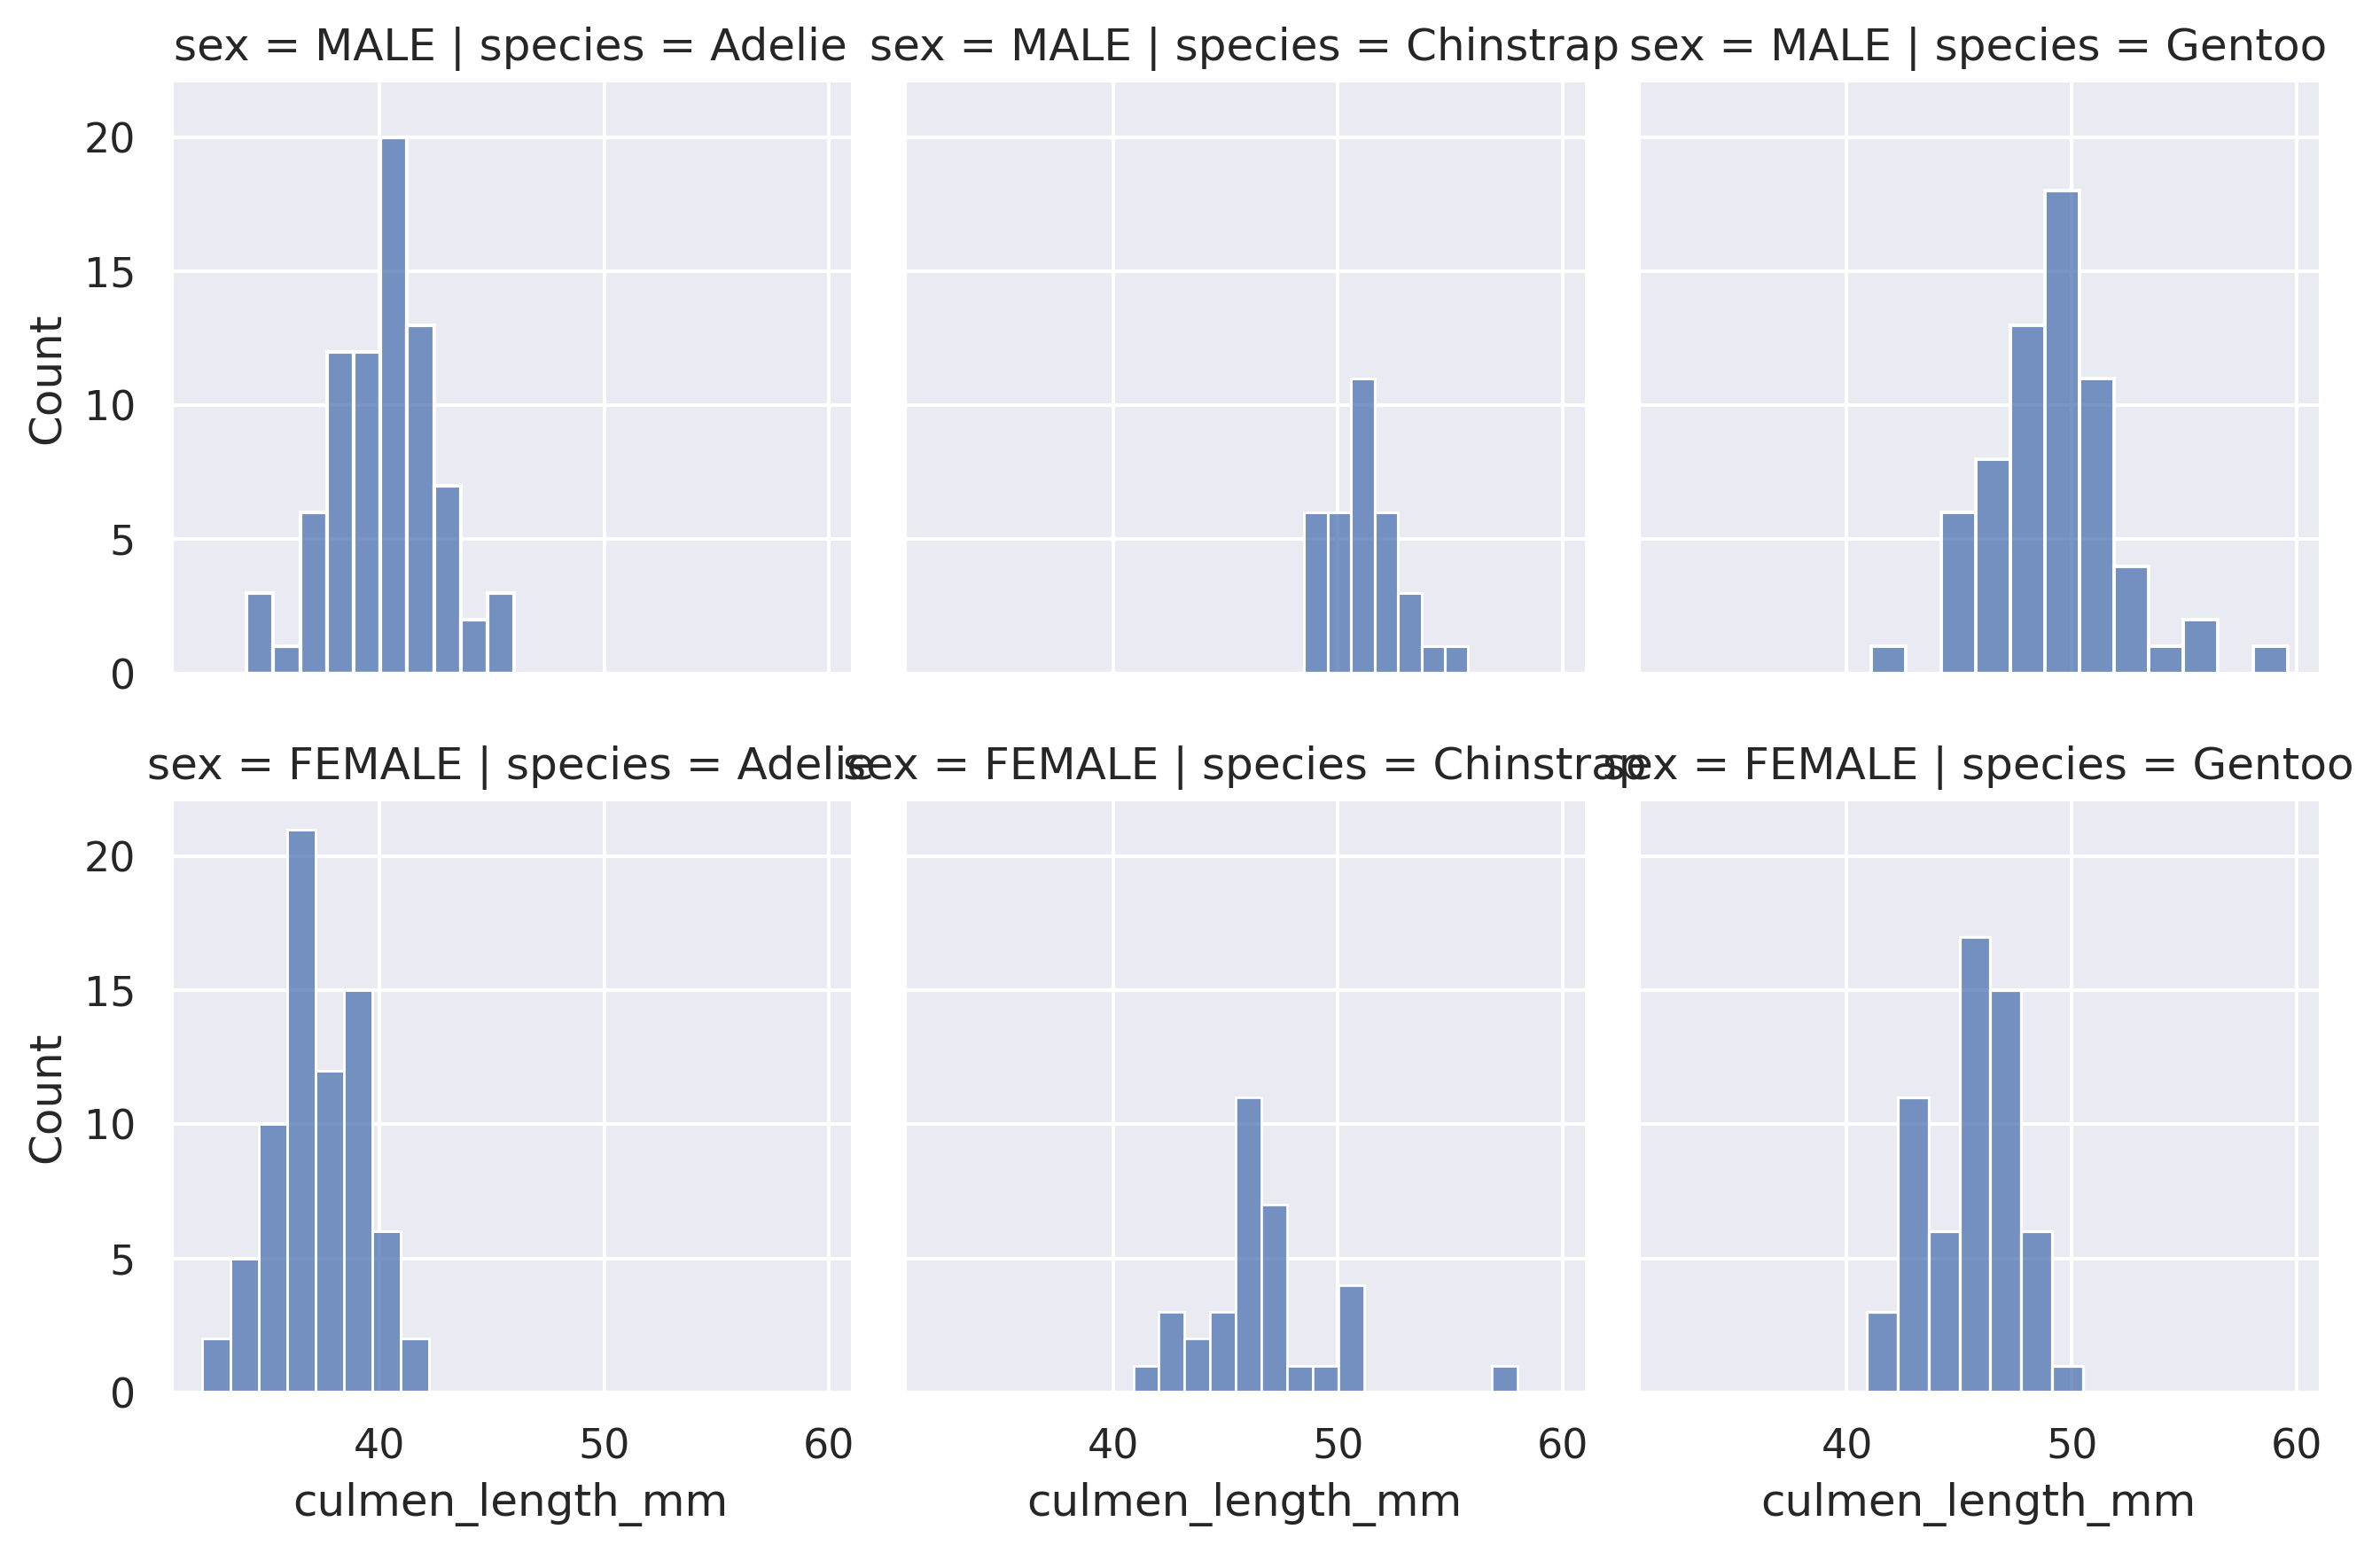

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

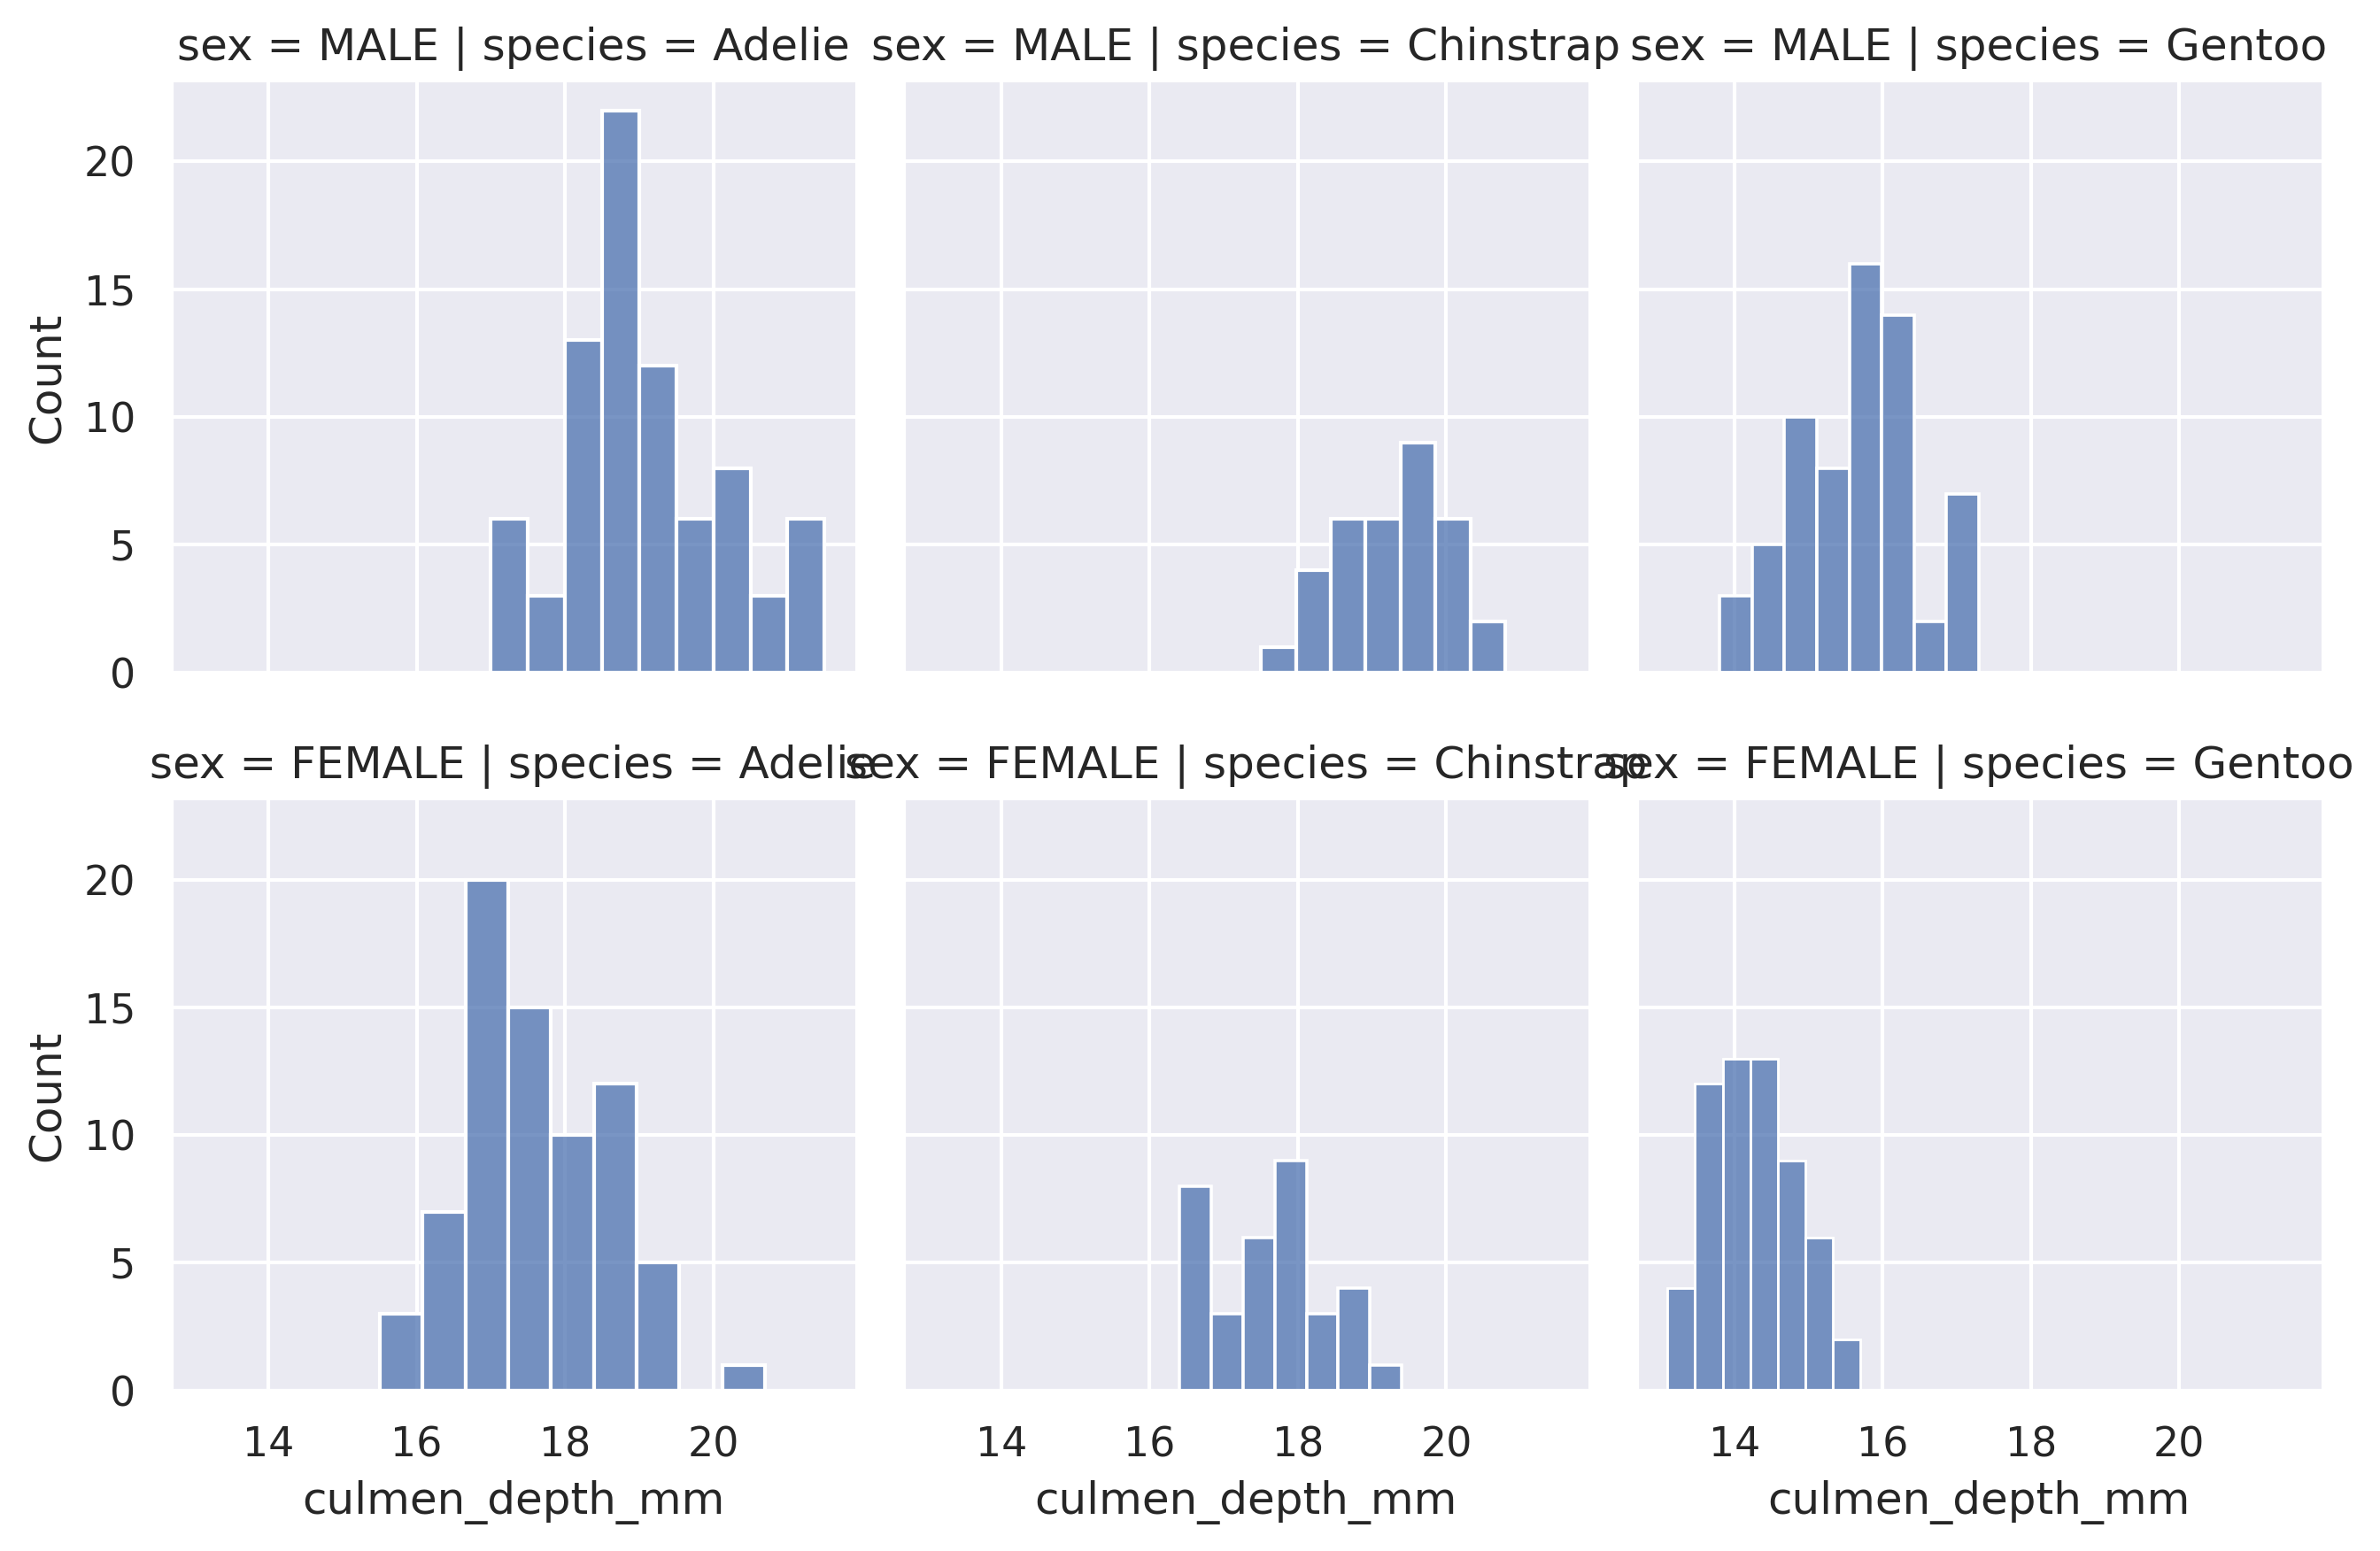

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

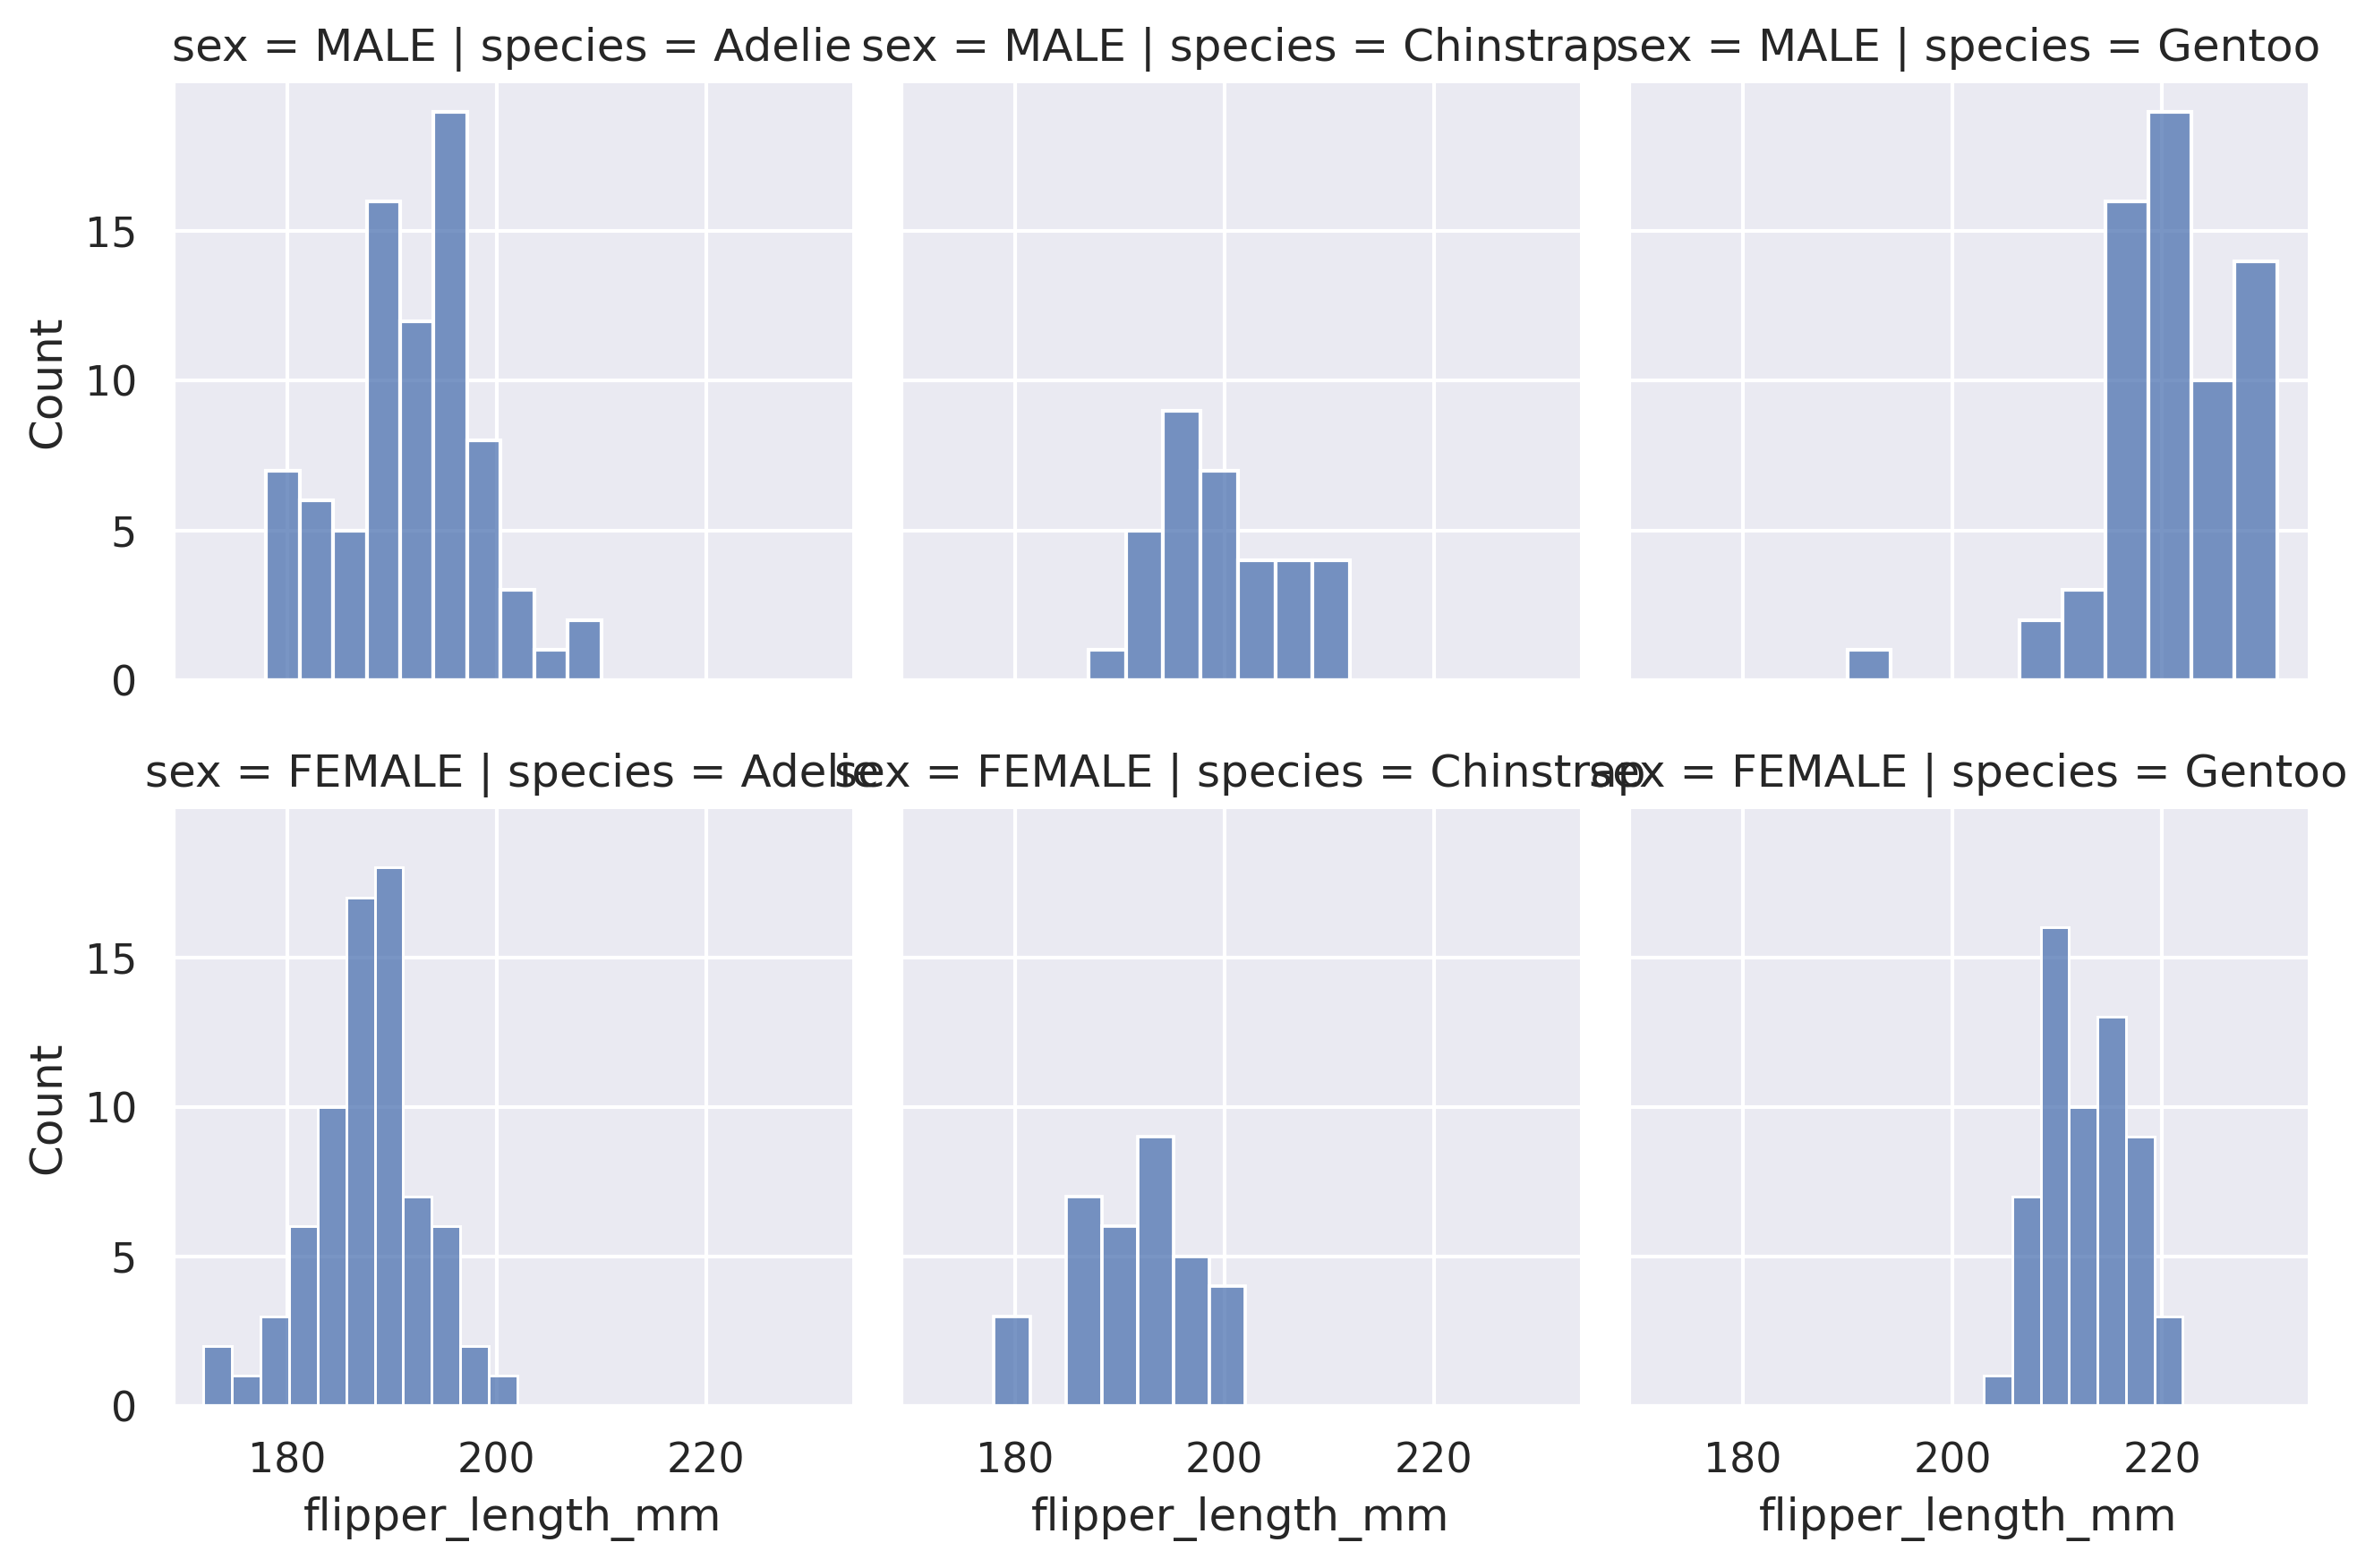

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "flipper_length_mm")
plt.show()

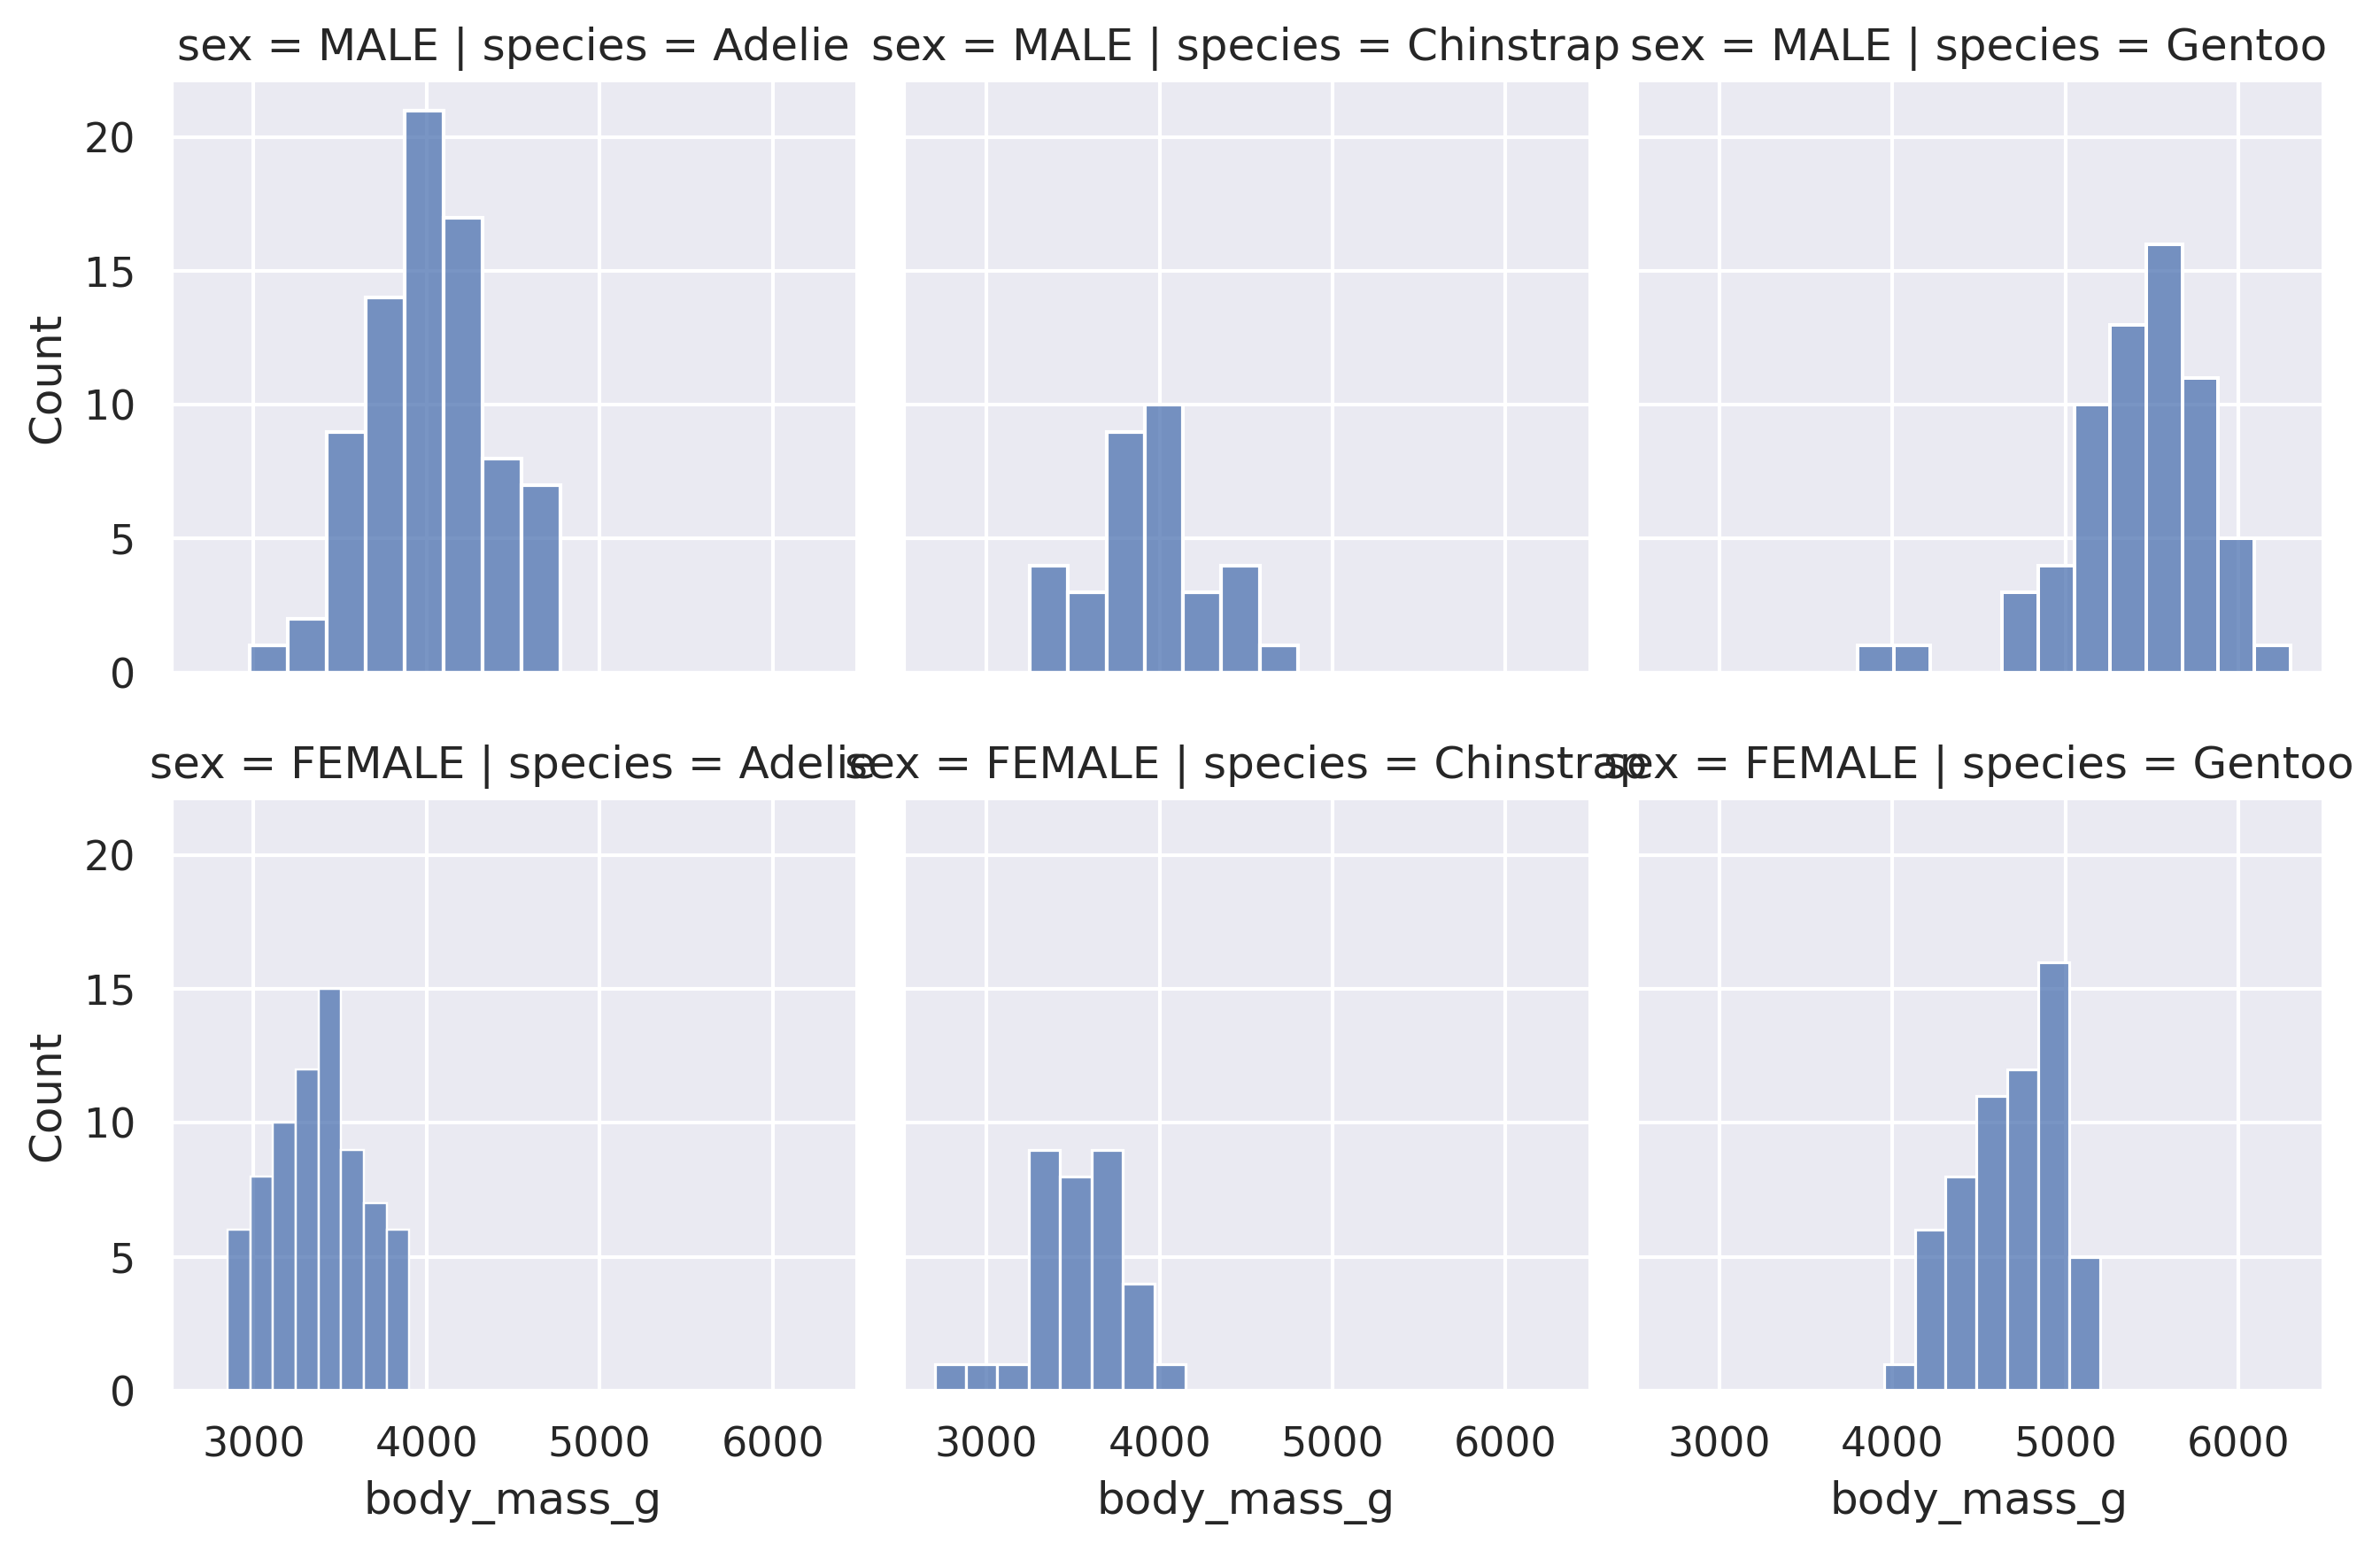

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "body_mass_g")
plt.show()

* We can see all numeric columns about species in bulk from this hist graphs.